In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import pickle
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random

In [5]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Pilot_v3')
PATH = os.getcwd()
save_path = '\\Figures\\'
if not os.path.exists(PATH+save_path):
        os.makedirs(PATH+save_path)

with open(PATH+"\\Analysis_Pull_List.txt","r") as pull_file:
    analysis_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt","r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()  
# SPECIFIC TO EXPERIMENT   
reaction_trials = 50    
timing_trials = 50
num_trials = 100 #number of trials in each block 
num_blocks = 6
tot_trials = num_trials*num_blocks
data_columns = len(fields_pull)
trial_time = 1500
num_subjects = len(analysis_pull_list)
wheel = dv.ColorWheel()

plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

In [7]:
#%% Plot properties
box_lw = 2.5 #box linewidth
boxwidth = .07 #box width
whisker_lw = 2.0 #whisker linewidth
circle_size = 8 

tp3_title = "1000,50"
tp4_title = "1000,150"
tp5_title = '1100,50'
tp6_title = "1100,150"
tp7_title = "1200,50"
tp8_title = '1200,150'
tp9_title = '1300,100'
tp10_title = '1300,200'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]

box_color1 = wheel.rak_red
box_color2 = wheel.rak_blue
box_color3 = '0.4'
#boxprops
two_props = {"facecolor": "none", "edgecolor" : box_color1, "linewidth": box_lw, "alpha": 1}
three_props = {"facecolor": "none", "edgecolor" : box_color2, "linewidth": box_lw, "alpha": 1}
four_props = {"facecolor": "none", "edgecolor" : box_color3, "linewidth": box_lw, "alpha": 1}
#whiskerprops
two_whisk = {"linewidth" : whisker_lw, "color": box_color1}
three_whisk = {"linewidth" : whisker_lw, "color": box_color2}
four_whisk = {"linewidth" : whisker_lw, "color": box_color3}
#capprops
two_cap = {"linewidth" : whisker_lw, "color": box_color1}
three_cap = {"linewidth" : whisker_lw, "color": box_color2}
four_cap = {"linewidth" : whisker_lw, "color": box_color3}
#medianprops
two_median = {"linewidth" : whisker_lw, "color": box_color1}     
three_median = {"linewidth" : whisker_lw, "color": box_color2}   
four_median = {"linewidth" : whisker_lw, "color": box_color3}        
    
#total_indecisions = np.concatenate((perc_player_indecisions,perc_indecisions_R))
props = [{}, {}, {}, {}, {}, {}]
props_dict = {}
box_color = 'grey'
dot_color = 'black'   

### Functions

In [8]:
def update_params(label_color):
    params = {"ytick.color" : label_color,
              "xtick.color" : label_color,
              "axes.labelcolor" : label_color,
              "axes.edgecolor" : label_color,
              "axes.titlecolor": label_color, 
              'legend.labelcolor': label_color,
              'figure.facecolor': 'black',
              'axes.facecolor' : 'black'
              }
    plt.rcParams.update(params)

In [9]:
def jitter(xlocs, data):
    if data.ndim >1:
        xlocs = np.tile(xlocs,(np.shape(data)[0],1))
        xlocs = xlocs + np.random.normal(0,0.05, np.shape(data))
    else:
        xlocs = xlocs + np.random.normal(0,0.05, np.shape(data))
    return xlocs

In [10]:
#%% Double Box plot with dots Function
def double_boxplot(X_locations, Y_locations, data1,data2, xlab, ylab, title, savename, save = False):
    if save:
        label_color = 'w'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    else:
        label_color = 'black'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    plt.figure(dpi = 125, figsize = (8,4))
    box_widths = 0.3
    X_locations = X_locations
    Y_locations = Y_locations
    ax = plt.subplot()
    ax.patch.set_alpha(0.05)
    markercolor = ['orange','r','g','b','black',wheel.dark_blue]
    total = np.concatenate((data1, data2))
    ax.plot(jitter(X_locations+box_widths/2,np.shape(data1)).T, data1.T,color = '0.3', marker= 'o', markerfacecolor = 'black', linewidth =1.5,alpha=0.5 )
    ax.plot(jitter(X_locations-box_widths/2, np.shape(data2)).T, data2.T,color = '0.3', marker= 'o', markerfacecolor = 'black', linewidth =1.5,alpha=0.5 )
    #bplot two  #block number, dyad, right/left
    ax.boxplot(data1, positions=X_locations+box_widths/2, patch_artist=True, boxprops = two_props, whiskerprops = two_whisk, 
                capprops = two_cap, medianprops = two_median, showfliers=False, widths = box_widths)
    #bplot three
    ax.boxplot(data2, positions = X_locations-box_widths/2, patch_artist=True, boxprops = three_props, whiskerprops = three_whisk,
                capprops = three_cap, medianprops=three_median, showfliers = False, widths = box_widths)
    ax.set_xticks(X_locations)
    ax.set_xticklabels(trial_block_titles)
    ax.set_yticks(Y_locations)
    ax.set_yticklabels(Y_locations) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    
    labels = ["Indecisions", "Incorrect Decisions"]
    colors = [wheel.dark_blue, wheel.dark_red]
    dv.Custom_Legend(ax, labels, colors, fontsize = 10)
    if save:
        plt.savefig(PATH+save_path+savename, dpi = 400, transparent = True, bbox_inches='tight')
    plt.show()

In [11]:
#%% Box plot with option to make double boxplot
def boxplot(data, xlocs, ylocs, box_widths = 0.15, shift_box = False, shift_direction = 1, 
            legend_labels = None, xlab = None, ylab=None, title=None):
    og_xlocs = xlocs
    box_xlocs = xlocs
    props = [two_props,two_whisk,two_cap,two_median]
    if shift_box:
        box_xlocs = box_xlocs + shift_direction*box_widths*4
        xlocs = xlocs + shift_direction*box_widths*4
        if shift_direction == 1:
            props = [three_props,three_whisk,three_cap,three_median]
        else:
            props = [two_props,two_whisk,two_cap,two_median]

    filtered_data = data
    if np.isnan(data).any():
        mask = ~np.isnan(data)
        filtered_data = [d[m] for d,m in zip(data.T, mask.T)]
    else:
        filtered_data = data
    ax.patch.set_alpha(0.05)
    markercolor = ['orange','r','g','b','black',wheel.dark_blue]
    ax.boxplot(filtered_data, positions=box_xlocs, patch_artist=True, boxprops = props[0], whiskerprops = props[1], 
                capprops = props[2], medianprops = props[3], showfliers=False, widths = (box_widths)*len(xlocs))
    ax.set_xticks(og_xlocs) 
    #ax.set_xticklabels(trial_block_titles)
    ax.set_yticks(ylocs)
    ax.set_yticklabels(ylocs) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    if shift_box:
        colors = [wheel.dark_blue,wheel.dark_red]
        dv.Custom_Legend(ax, legend_labels, colors, fontsize = 10)


In [12]:
#%% Scatter plot, two separate data sets on same plot
def two_data_scatter_correlation(data1a, data1b, data2a, data2b, 
                                 X_locations, Y_locations, 
                                 xlab, ylab, title, color1, color2, 
                                 savename, save):
    # =============================================================================
    #     Calculate Linear model
    # =============================================================================
    # Combine the two groups ------------------------------------------------
    all_data_a = np.concatenate((data1a,data2a))
    all_data_a = all_data_a.flatten()
    all_data_b = np.concatenate((data1b,data2b))
    all_data_b = all_data_b.flatten()
    
    # Linear model ---------------------------------------------------------------
    
    print(all_data_a)
    print()
    print(all_data_b)
    lm = stats.linregress(all_data_a,all_data_b)
    x = np.arange(min(X_locations)+2,max(X_locations)-10,10)
    y = lm.slope*x + lm.intercept
    spear_r = stats.spearmanr(all_data_a, all_data_b)
    if save:
        label_color = 'w'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    else:
        label_color = 'black'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    plt.figure(dpi = 300, figsize = (6,4))
    X_locations = X_locations
    Y_locations = Y_locations
    ax = plt.subplot()
    ax.patch.set_alpha(0.05)
    ax.scatter(data1a, data1b, c = color1)
    ax.scatter(data2a, data2b, c = color2)
    ax.plot(x,y,c='grey')
    ax.text(X_locations[2],Y_locations[2],r'$\rho$'+f' = {spear_r.correlation:0.3f}')
    ax.text(X_locations[2],Y_locations[2]-17,r'p'+f' = {spear_r.pvalue:0.3f}')
    ax.set_xticks(X_locations)
    ax.set_xticklabels(X_locations)
    ax.set_yticks(Y_locations)
    ax.set_yticklabels(Y_locations) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    labels = ["Full Feedback", "Feedback Loss"]
    colors = [wheel.dark_blue, wheel.dark_red]
    dv.Custom_Legend(ax, labels, colors, fontsize = 10)
    plt.tight_layout()
    if save:
        plt.savefig(PATH+save_path+savename, dpi = 400, transparent = True, bbox_inches='tight')
    plt.show()

In [13]:
#%% Scatter plot, one data set 
def one_data_scatter_correlation(data1a, data1b,
                                 X_locations, Y_locations, 
                                 xlab, ylab, title, color1, color2, 
                                 savename, save):
    data1_f = data1a.flatten()
    data2_f= data1b.flatten()
    lm = stats.linregress(data1_f,data2_f)
    x = np.arange(min(X_locations)+2,max(X_locations)-10,10)
    y = lm.slope*x + lm.intercept
    spear_r = stats.spearmanr(data1_f, data2_f)
    if save:
        label_color = 'w'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    else:
        label_color = 'black'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    plt.figure(dpi = 300, figsize = (6,4))
    X_locations = X_locations
    Y_locations = Y_locations
    ax = plt.subplot()
    ax.patch.set_alpha(0.05)
    ax.scatter(data1a, data1b, c = color1)
    ax.plot(x,y,c='grey')
    ax.text(X_locations[2],Y_locations[2],r'$\rho$'+f' = {spear_r.correlation:0.3f}')
    ax.text(X_locations[2],Y_locations[2]-17,r'p'+f' = {spear_r.pvalue:0.3f}')
    ax.set_xticks(X_locations)
    ax.set_xticklabels(X_locations)
    ax.set_yticks(Y_locations)
    ax.set_yticklabels(Y_locations) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    labels = ["Full Feedback", "Feedback Loss"]
    colors = [wheel.dark_blue, wheel.dark_red]
    #dv.Custom_Legend(ax, labels, colors, fontsize = 10)
    plt.tight_layout()
    if save:
        plt.savefig(PATH+save_path+savename, dpi = 400, transparent = True, bbox_inches='tight')
    plt.show()

### Pickle

In [14]:
#%% Pickle load 
player_wins = np.zeros((num_subjects, num_blocks))
player_indecisions = np.zeros((num_subjects, num_blocks))
perc_player_wins = np.zeros((num_subjects, num_blocks))
perc_player_wins_first_half = np.zeros((num_subjects, num_blocks))
perc_player_wins_second_half = np.zeros((num_subjects, num_blocks))
perc_player_wins_cut_off = np.zeros((num_subjects, num_blocks))
perc_player_indecisions = np.zeros((num_subjects, num_blocks))
perc_player_indecisions_first_half = np.zeros((num_subjects, num_blocks))
perc_player_indecisions_second_half = np.zeros((num_subjects, num_blocks))
perc_player_indecisions_cut_off = np.zeros((num_subjects, num_blocks))
trial_table = np.empty((num_subjects, tot_trials, 4), int)
player_reach_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
player_decision_array = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
reaction_time = np.zeros([num_subjects,reaction_trials])*np.nan 
reaction_movement_time = np.zeros([num_subjects,reaction_trials])*np.nan 
rt_trial_start = np.zeros((num_subjects,reaction_trials))*np.nan 
timing_reach_time = np.zeros([num_subjects,reaction_trials])*np.nan 
hand_pos_data = np.zeros((num_subjects, num_blocks, num_trials, trial_time+500, 4))*np.nan
agent_decision_time = np.zeros((num_subjects,num_blocks,num_trials))
agent_target_selection = np.zeros((num_subjects,num_blocks,num_trials))
player_incorrect_decisions = np.zeros((num_subjects,num_blocks))
perc_player_incorrect_decisions = np.zeros((num_subjects,num_blocks))
perc_player_incorrect_decisions_first_half = np.zeros((num_subjects, num_blocks))
perc_player_incorrect_decisions_second_half = np.zeros((num_subjects, num_blocks))
perc_player_incorrect_decisions_cut_off = np.zeros((num_subjects, num_blocks))
player_decision_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
for i in range(num_subjects):
    subname = analysis_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    player_indecisions[i,:] = pickle.load(open(data_path + f'{subname}_player_indecisions.pkl', 'rb'))
    player_wins[i,:] = pickle.load(open(data_path + f'{subname}_player_wins.pkl', 'rb'))
    perc_player_indecisions[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_indecisions.pkl', 'rb'))
    perc_player_indecisions_first_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_indecisions_first_half.pkl', 'rb'))
    perc_player_indecisions_second_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_indecisions_second_half.pkl', 'rb'))
    perc_player_indecisions_cut_off[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_indecisions_cut_off.pkl', 'rb'))
    
    perc_player_wins[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_wins.pkl', 'rb'))
    perc_player_wins_first_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_wins_first_half.pkl', 'rb'))
    perc_player_wins_second_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_wins_second_half.pkl', 'rb'))
    perc_player_wins_cut_off[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_wins_cut_off.pkl', 'rb'))
    
    perc_player_incorrect_decisions[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_incorrect_decisions.pkl', 'rb'))
    perc_player_incorrect_decisions_first_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_incorrect_decisions_first_half.pkl', 'rb'))
    perc_player_incorrect_decisions_second_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_incorrect_decisions_second_half.pkl', 'rb'))
    perc_player_incorrect_decisions_cut_off[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_incorrect_decisions_cut_off.pkl', 'rb'))
    #trial_table[i,:,:] = pickle.load(open(data_path + f'{subname}_trial_table.pkl', 'rb'))
    player_reach_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_reach_time.pkl', 'rb'))
    hand_pos_data[i,:,:,:,:] = pickle.load(open(data_path+f'{subname}_hand_pos_data.pkl', 'rb'))
    reaction_time[i,:] = pickle.load(open(data_path + f'{subname}_reaction_time.pkl', 'rb'))
    reaction_movement_time[i,:] = pickle.load(open(data_path + f'{subname}_reaction_movement_time.pkl', 'rb'))
    rt_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_rt_trial_start.pkl', 'rb'))
    agent_decision_time[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_decision_time.pkl', 'rb'))
    agent_target_selection[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_target_selection.pkl', 'rb'))
    player_incorrect_decisions[i,:] = pickle.load(open(data_path + f'{subname}_player_incorrect_decisions.pkl', 'rb'))
    player_decision_time[i,:] = pickle.load(open(data_path + f'{subname}_player_decision_time.pkl', 'rb'))
    player_decision_array[i,:] = pickle.load(open(data_path + f'{subname}_player_decision_array.pkl', 'rb'))
    timing_reach_time[i,:] = pickle.load(open(data_path + f'{subname}_timing_reach_time.pkl', 'rb'))
agent_reach_time = agent_decision_time+150

In [15]:
num_subjects

5

### Calculations

Reaction and Reaction Movement Time

In [16]:
#%% Calculate RT means and sds
rt_mean = np.zeros(num_subjects)
rt_sd = np.zeros(num_subjects)
rmt_mean = np.zeros(num_subjects)
rmt_sd = np.zeros(num_subjects)
movement_time_mean = np.zeros(num_subjects)
movement_time_sd = np.zeros(num_subjects)
movement_time = reaction_movement_time - reaction_time
reaction_time_mean = np.nanmean(reaction_time, axis = 1)
mean_timing_reach_times = np.nanmean(timing_reach_time, axis=1)
# Reaction time
for i in range(num_subjects):
    rt_mean[i] = np.nanmean(reaction_time[i,25:])
    rt_sd[i] = np.nanstd(reaction_time[i,25:])
    rmt_mean[i] = np.nanmean(reaction_movement_time[i,25:])
    rmt_sd[i] = np.nanstd(reaction_movement_time[i,25:])
    movement_time_mean[i] = np.nanmean(movement_time[i,25:])
    movement_time_sd[i] = np.nanstd(movement_time[i,25:])


Experiment reach and decision times

In [17]:
# Actual trials
agent_mean_reach_time = np.nanmean(agent_reach_time,axis = 2)
agent_sd_reach_time = np.nanstd(agent_reach_time,axis = 2)
agent_mean_decision_time = np.nanmean(agent_decision_time, axis =2)
agent_sd_decision_time = np.nanstd(agent_decision_time, axis =2)
player_mean_reach_time = np.nanmean(player_reach_time,axis=2)
player_sd_reach_time = np.nanstd(player_reach_time,axis=2)
player_mean_decision_time = np.nanmean(player_decision_time,axis=2)
player_sd_decision_time = np.nanstd(agent_reach_time,axis = 2)

Reach Times on Indecisions

In [18]:
#%% Find agent reach times for player indecisions
agent_decision_time_on_indecisions = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
player_reach_time_on_indecisions = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
player_left_time_on_indecisions = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
agent_mean_reach_time_on_indecisions = np.zeros((num_subjects,num_blocks))*np.nan
player_mean_reach_time_on_indecisions = np.zeros((num_subjects,num_blocks))*np.nan
player_mean_left_time_on_indecisions = np.zeros((num_subjects,num_blocks))*np.nan
indecision_index = np.argwhere(player_reach_time>1500)

c=0
for i,j,k in indecision_index:
    agent_decision_time_on_indecisions[i,j,k] = agent_decision_time[i,j,k]
    player_reach_time_on_indecisions[i,j,k] = player_reach_time[i,j,k]
    player_left_time_on_indecisions[i,j,k] = player_decision_time[i,j,k]
    c+=1
for i in range(num_subjects):
    for j in range(num_blocks):
        agent_mean_reach_time_on_indecisions[i,j] = np.nanmean(agent_decision_time_on_indecisions[i,j,:])
        player_mean_reach_time_on_indecisions[i,j] = np.nanmean(player_reach_time_on_indecisions[i,j,:])
        player_mean_left_time_on_indecisions[i,j] = np.nanmean(player_left_time_on_indecisions[i,j,:])



Gamble and reaction calculations

In [19]:
REACTION_TIME = 275

In [20]:
# Go through gamble reach times and then wins, indecisions, losses separately for reaction and gambles
#%% Average agent mean reach time on gamb

gamble_left_target_time = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
gamble_reach_target_time = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
agent_reach_time_gambles = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
agent_decision_time_gambles = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
gamble_index = np.argwhere(abs(agent_decision_time-player_decision_time)<REACTION_TIME)
for i,j,k in gamble_index:
    gamble_left_target_time[i,j,k] = player_decision_time[i,j,k]
    gamble_reach_target_time[i,j,k] = player_reach_time[i,j,k]
    agent_reach_time_gambles[i,j,k] = agent_reach_time[i,j,k]
    agent_decision_time_gambles[i,j,k] = agent_decision_time[i,j,k]

#%% Count wins where they gambled, wins where they reacted, losses when they gambled, losses when they reacted, and indecisions
## 200 is probably too small for two choice reaction 
gamble_index = np.argwhere(player_decision_time-agent_decision_time<REACTION_TIME)
reaction_index = np.argwhere((player_decision_time-agent_decision_time>=REACTION_TIME))
did_not_leave_start_index = np.argwhere((np.isnan(player_decision_time))) # This indiddex is for if they left the start too early, or didn't leave at all

#left_out = np.argwhere()
gamble_wins = np.zeros((num_subjects, num_blocks))
gamble_indecisions = np.zeros((num_subjects, num_blocks))
gamble_losses = np.zeros((num_subjects, num_blocks))
reaction_wins = np.zeros((num_subjects, num_blocks))
reaction_indecisions = np.zeros((num_subjects, num_blocks))
reaction_losses = np.zeros((num_subjects, num_blocks))
for i,j,k in gamble_index:
    if player_decision_array[i,j,k] == 1 and (agent_target_selection[i,j,k] == 1 or agent_target_selection[i,j,k] == 0):
        gamble_wins[i,j] += 1
    elif player_decision_array[i,j,k] == -1 and (agent_target_selection[i,j,k] == -1 or agent_target_selection[i,j,k] == 0):
        gamble_wins[i,j] += 1
    elif player_decision_array[i,j,k] == 0:
        gamble_indecisions[i,j] += 1
    elif player_decision_array[i,j,k]*agent_target_selection[i,j,k] == -1:
        gamble_losses[i,j] += 1
    else:
        print('none')
    
  
for i,j,k in reaction_index:
    if player_decision_array[i,j,k] ==  1 and (agent_target_selection[i,j,k] == 1 or agent_target_selection[i,j,k] == 0):
        reaction_wins[i,j] += 1
    elif player_decision_array[i,j,k] == -1 and (agent_target_selection[i,j,k] == -1 or agent_target_selection[i,j,k] == 0):
        reaction_wins[i,j] += 1
    elif player_decision_array[i,j,k] == 0:
        reaction_indecisions[i,j] += 1
    elif player_decision_array[i,j,k]*agent_target_selection[i,j,k] == -1:
        reaction_losses[i,j] += 1
    else:
        print("none triggerd")
for i,j,k in did_not_leave_start_index:
    if player_decision_array[i,j,k] == 0:
        reaction_indecisions[i,j]+=1 # If they ended up not mkaing it, it was likely due to reaction indecision
    #lif player_decision_array[i,j,k]*agent_target_selection[i,j,k]>0:
       
perc_gamble_wins = gamble_wins/num_trials*100
perc_gamble_losses = gamble_indecisions/num_trials*100
perc_gamble_indecisions = gamble_losses/num_trials*100
perc_reaction_wins = reaction_wins/num_trials*100
perc_reaction_losses = reaction_losses/num_trials*100
perc_reaction_indecisions = reaction_indecisions/num_trials*100


In [21]:
# Calculate the average reach time for each subject when they gamble for each condition 
gamble_index = np.argwhere(player_decision_time-agent_decision_time<REACTION_TIME)
reaction_index = np.argwhere((player_decision_time-agent_decision_time>=REACTION_TIME))
did_not_leave_start_index = np.argwhere((np.isnan(player_decision_time)))
gamble_decision_times = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
reaction_decision_times = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
for i,j,k in gamble_index:
    gamble_decision_times[i,j,k] = player_decision_time[i,j,k]
for i,j,k in reaction_index:
    reaction_decision_times[i,j,k] = player_decision_time[i,j,k]
    
# get means
gamble_decision_time_means = np.nanmean(gamble_decision_times, axis =2 )
reaction_decision_time_means = np.nanmean(reaction_decision_times, axis =2 )

C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_22820\1678591353.py:14: RuntimeWarning: Mean of empty slice
  reaction_decision_time_means = np.nanmean(reaction_decision_times, axis =2 )


In [22]:
for i,j,k in gamble_index:
    print(agent_decision_time[i,j,k]-gamble_decision_times[i,j,k])

-144.90856933594
109.37658691406
-75.90686035156
-83.23498535156
-97.01428222656
125.95751953125
-82.1259765625
-3.061279296880002
-89.42761230469
-25.464599609380002
-45.30419921875
138.75476074219
-67.642578125
-68.75219726562
-67.85021972656
6.919921875
-111.41748046875
238.3779296875
-76.96423339844
-5.238159179690001
-108.51306152344
-56.0986328125
-96.73107910156
-58.44140625
-65.73095703125
-101.857421875
-48.94091796875
-77.79248046875
-79.75903320312
-136.78271484375
111.01232910156
-94.88586425781
-66.41223144531
-119.37854003906
-79.11022949219
-12.815551757809999
-109.32958984375
-134.80151367188
-126.45349121094
-118.45458984375
-117.62805175781
-95.25061035156
-124.43530273438
-120.25231933594
-130.39099121094
-107.20922851562
-115.71459960938
-118.34204101562
-11.559814453119998
-68.64611816406
-88.18981933594
42.89038085938
-131.13403320312
-140.30102539062
-119.59912109375
-119.69128417969
150.82824707031
-124.00622558594
37.72045898438
81.05187988281
-65.75854492188
-

Wins when both decide

In [23]:
# Get agent decision array
agent_decision_array = np.zeros((num_subjects,num_blocks,num_trials))
player_both_reached_wins = np.zeros((num_subjects, num_blocks))
perc_player_both_reached_wins = np.zeros((num_subjects, num_blocks))
agent_both_reached_wins = np.zeros((num_subjects, num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        for k in range(num_trials):
            if agent_reach_time[i,j,k]>1500:
                agent_decision_array[i,j,k] = 0
            else:
                agent_decision_array[i,j,k] = agent_target_selection[i,j,k]
# Get wins when both decide
both_decide_index = np.argwhere(np.logical_and(player_decision_array!=0,agent_decision_array!=0))

for i in range(num_subjects):
    for j in range(num_blocks):
        for k in range(num_trials):
            if agent_decision_array[i,j,k]*player_decision_array[i,j,k] == 1:
                player_both_reached_wins[i,j]+=1
            if agent_decision_array[i,j,k]*player_decision_array[i,j,k] == -1:
                agent_both_reached_wins[i,j]+=1
        x = np.count_nonzero(player_decision_array[i,j,:]!=0)
        y = np.count_nonzero(agent_decision_array[i,j,:]!=0)
        if x!= 0 and y!= 0:
            total = np.count_nonzero(np.logical_and(player_decision_array[i,j,:]!=0,agent_decision_array[i,j,:]!=0))
            perc_player_both_reached_wins[i,j] = (player_both_reached_wins[i,j]/total)*100



### Plots

In [24]:
update_params('w')

Reaction time means boxplot

In [61]:
help(dv.boxplot)

Help on function boxplot in module data_visualization.boxplot:

boxplot(data, **kwargs)
    box_lw       = kwargs.get("box_lw", 1.2)
    box_width    = kwargs.get("box_width", .5)
    whisker_lw   = kwargs.get("whisker_lw", 1.2)
    
    color = kwargs.get("color",   "#0BB8FD")
    x_pos = kwargs.get("x_pos", 0.25)
    ax = kwargs.get("ax", None)



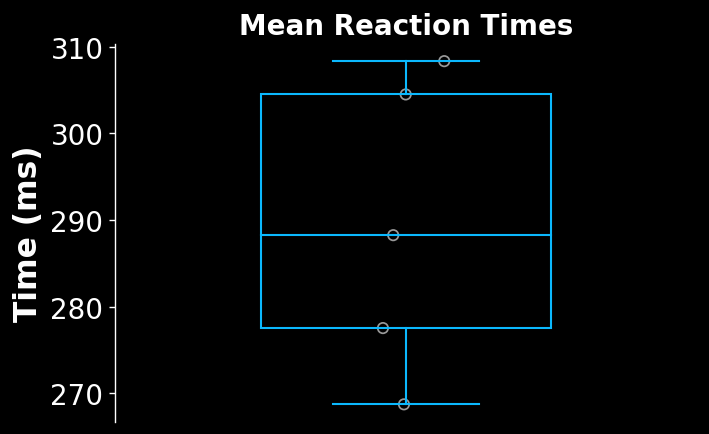

In [63]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, rt_mean), rt_mean, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(rt_mean, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Reaction Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(PATH+save_path+'reaction_times', dpi = 400, transparent = True, bbox_inches='tight')


Reaction time SD 

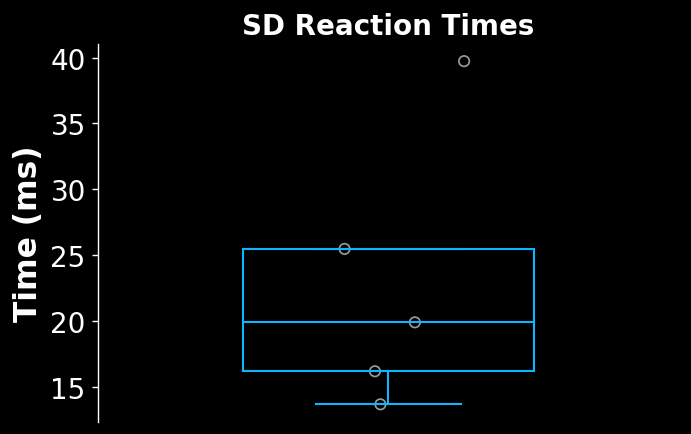

In [26]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, rt_sd), rt_sd, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(rt_sd, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('SD Reaction Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(PATH+save_path+'reaction_times_sd', dpi = 400, transparent = True, bbox_inches='tight')

Reaction Movement time boxplot

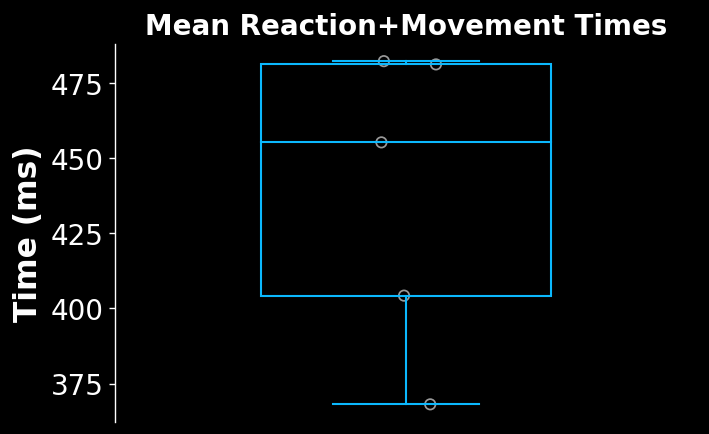

In [27]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, rmt_mean), rmt_mean, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(rmt_mean, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Reaction+Movement Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(PATH+save_path+'reaction_movement_times', dpi = 400, transparent = True, bbox_inches='tight')


REaction Movement time sd boxplot

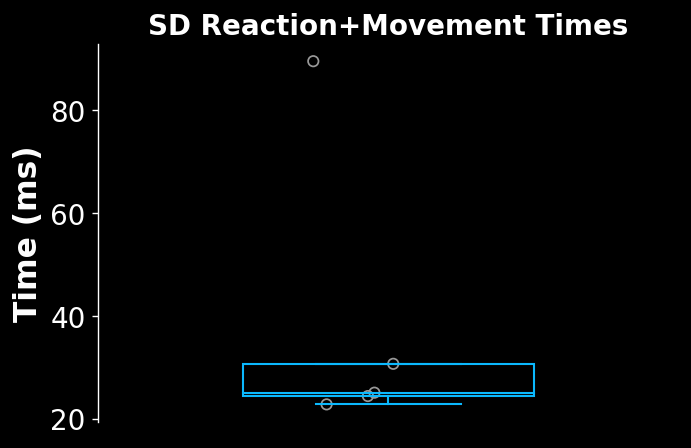

In [28]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, rmt_sd), rmt_sd, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(rmt_sd, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('SD Reaction+Movement Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(PATH+save_path+'reaction_movement_times_sd', dpi = 400, transparent = True, bbox_inches='tight')

Movement Times

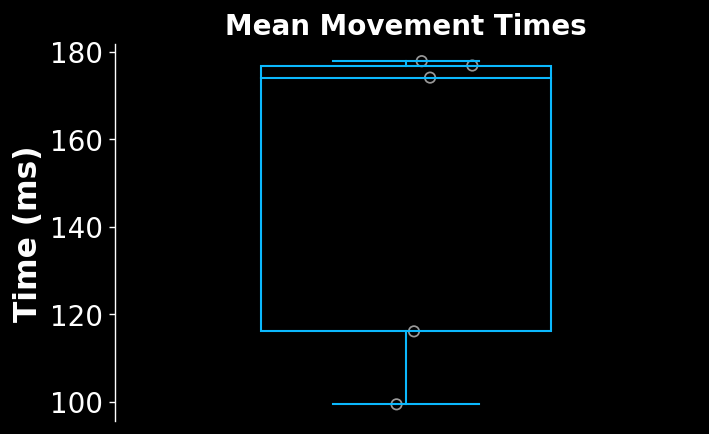

In [29]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, movement_time_mean), movement_time_mean, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(movement_time_mean, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Movement Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(PATH+save_path+'movement_times', dpi = 400, transparent = True, bbox_inches='tight')

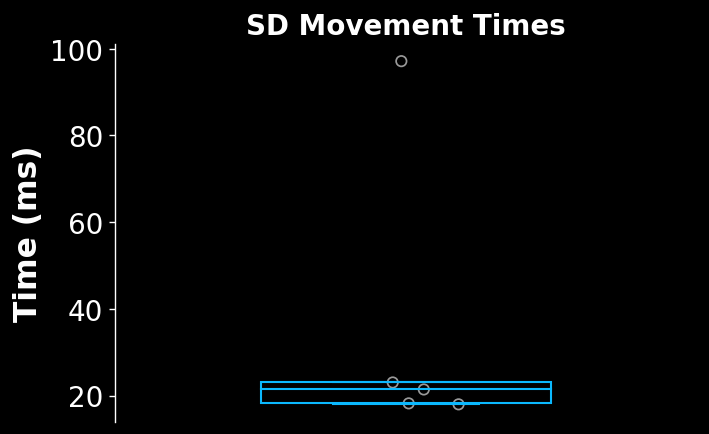

In [30]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, movement_time_sd), movement_time_sd, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(movement_time_sd, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('SD Movement Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(PATH+save_path+'movement_times_sd', dpi = 400, transparent = True, bbox_inches='tight')

Timing

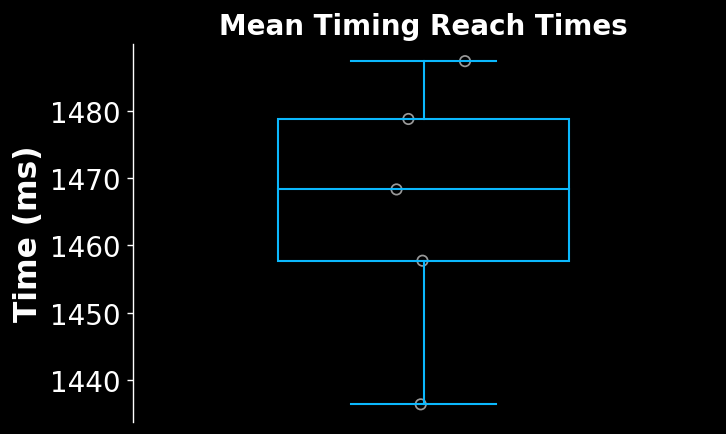

In [31]:

mean_timing_reach_times = np.nanmean(timing_reach_time, axis=1)
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, mean_timing_reach_times), mean_timing_reach_times, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(mean_timing_reach_times, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Timing Reach Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(PATH+save_path+'timing_reach_times_mean', dpi = 400, transparent = True, bbox_inches='tight')

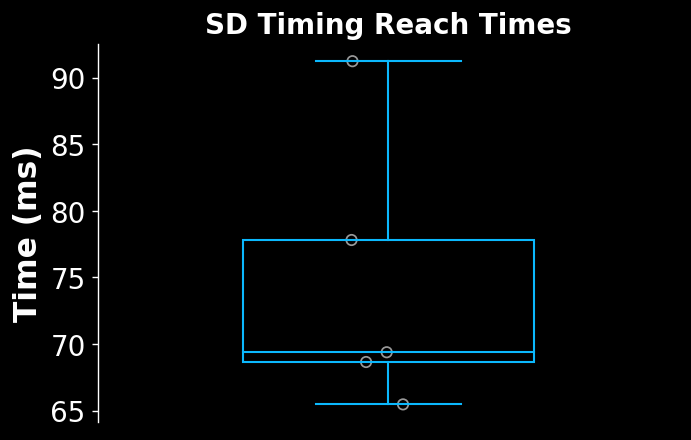

In [32]:
sd_timing_reach_times = np.nanstd(timing_reach_time, axis=1)
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, sd_timing_reach_times), sd_timing_reach_times, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(sd_timing_reach_times, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('SD Timing Reach Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(PATH+save_path+'timing_reach_times_sd', dpi = 400, transparent = True, bbox_inches='tight')

Task Movement Times 

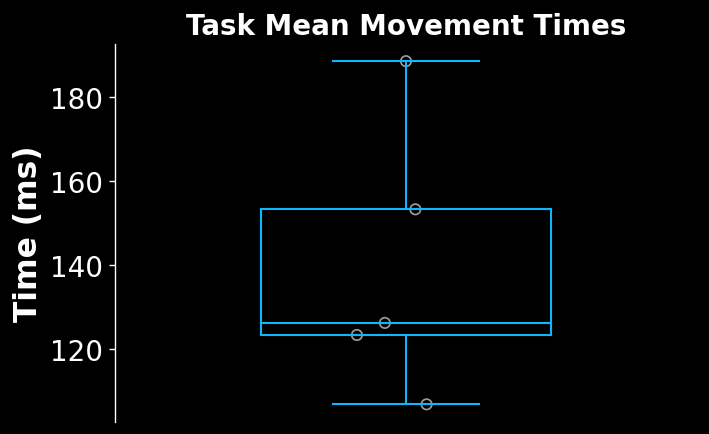

In [33]:
task_movement_times = player_reach_time - player_decision_time
mean_task_movement_times = np.nanmean(task_movement_times, axis = 2)
mean_task_movement_times = np.nanmean(mean_task_movement_times, axis =1)
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, mean_task_movement_times), mean_task_movement_times, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(mean_task_movement_times, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Task Mean Movement Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(PATH+save_path+'task_movement_times_mean', dpi = 400, transparent = True, bbox_inches='tight')


Decision Times boxplot

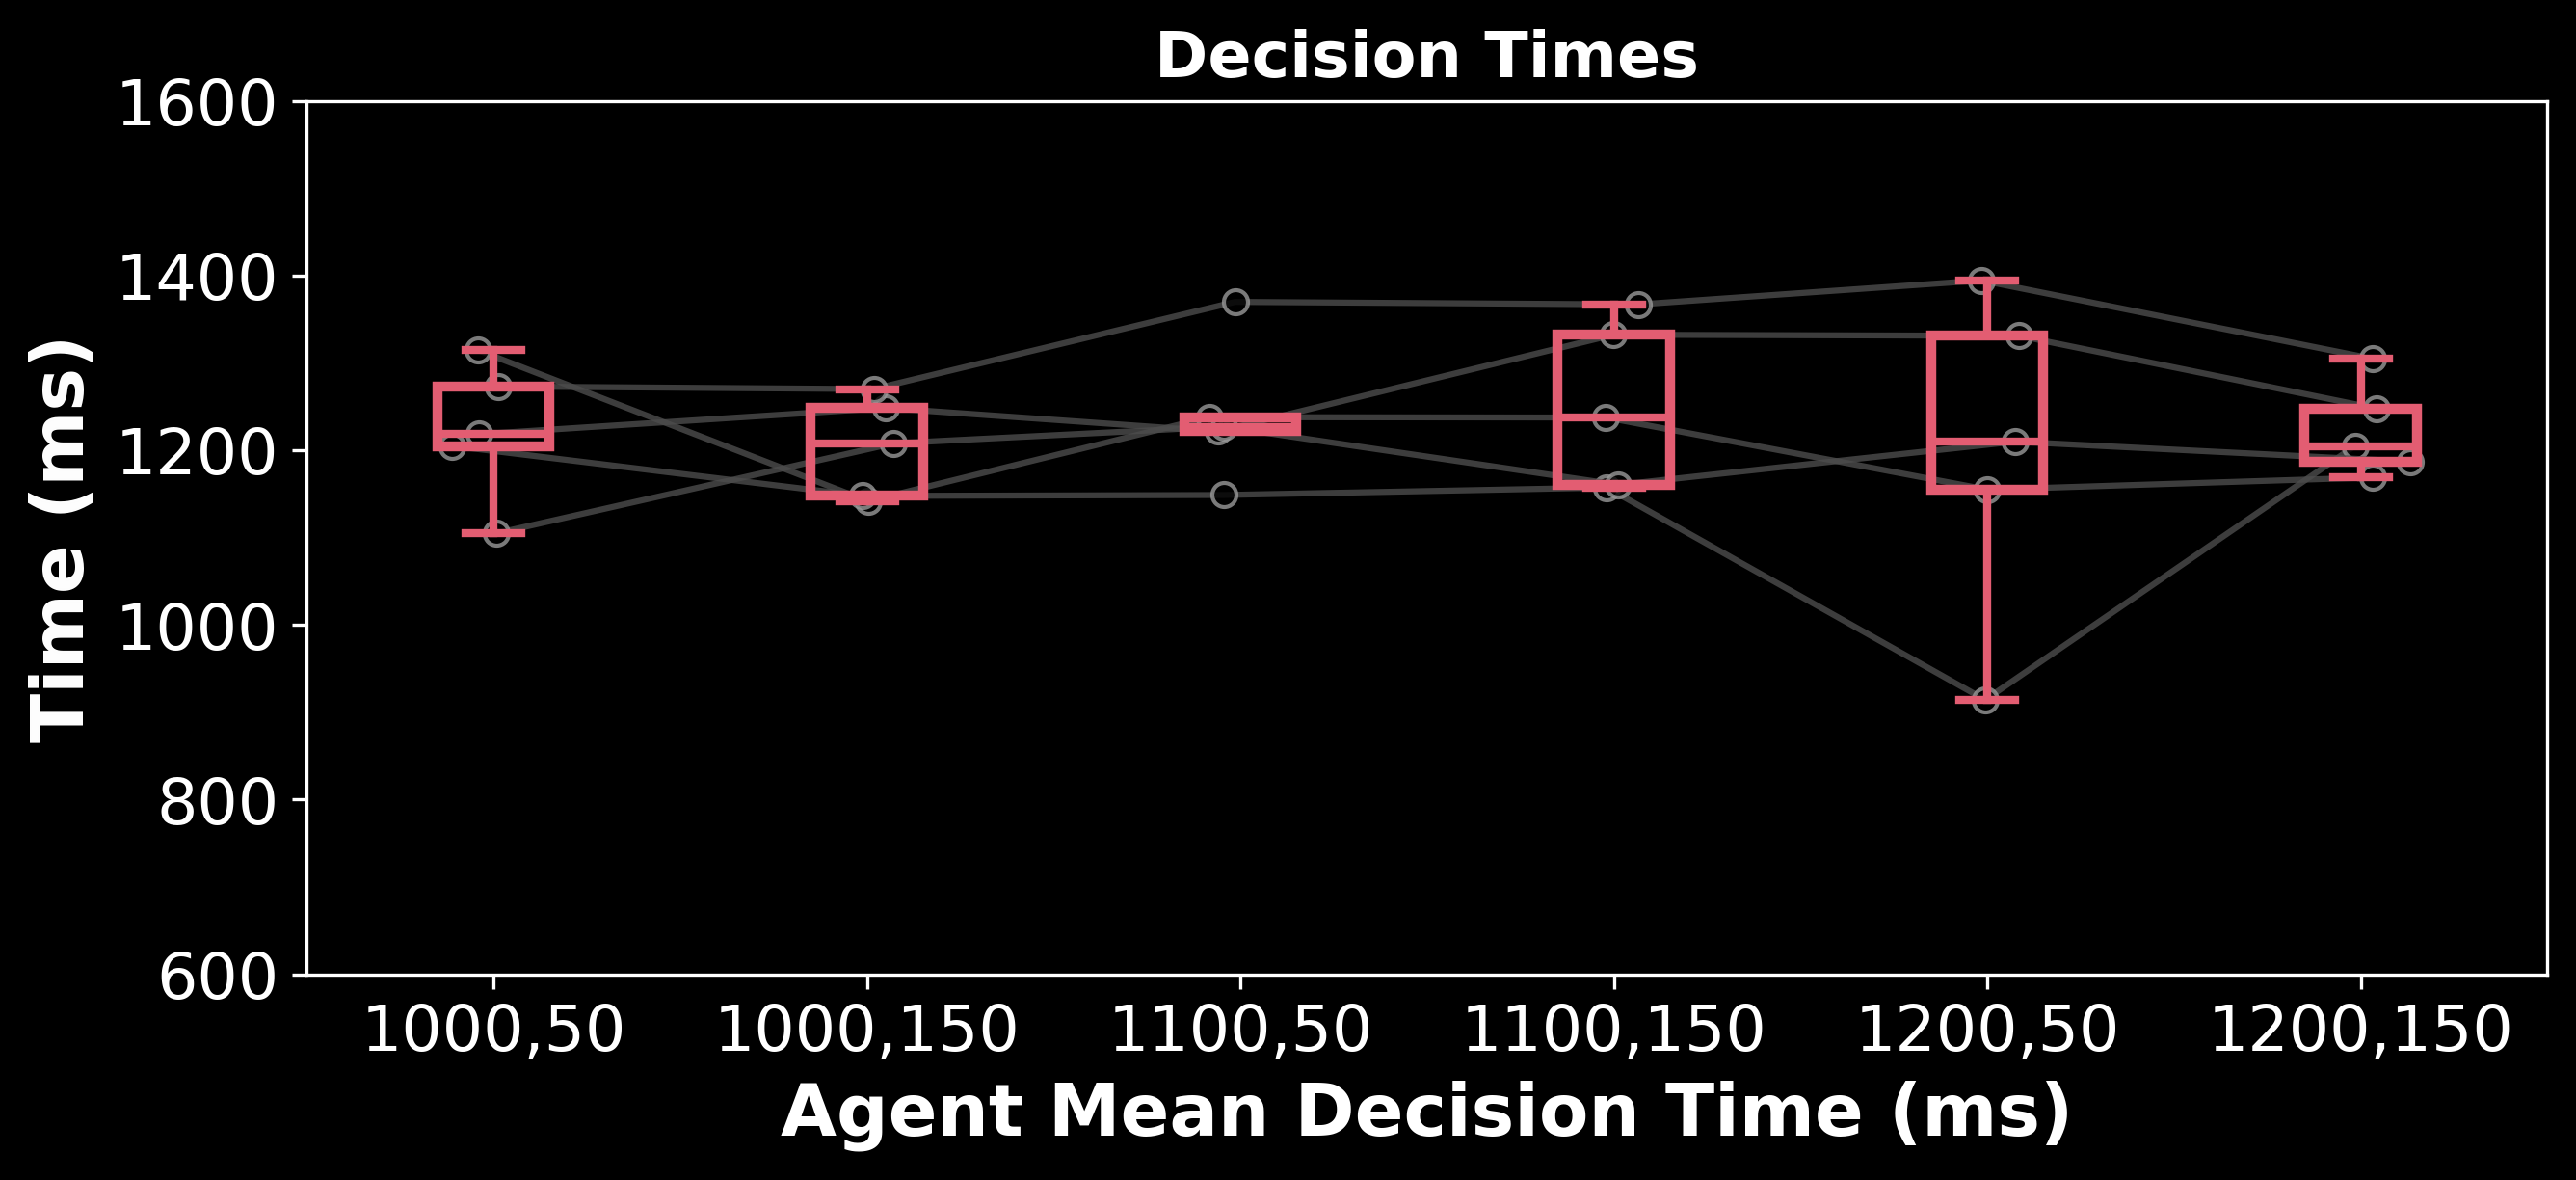

In [34]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,1800,200)
plt.figure(dpi=300, figsize = (10,4))
ax=plt.subplot()

ax.plot(jitter(xlocs, player_mean_decision_time).T,player_mean_decision_time.T, marker = 'o', markerfacecolor = dot_color, markeredgecolor = '0.6', color = '0.3', alpha = 0.8,zorder=1 )
boxplot(player_mean_decision_time, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean Decision Time (ms)",
        ylab='Time (ms)', title='Decision Times')
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(600,1600)
plt.savefig(PATH+save_path+'decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

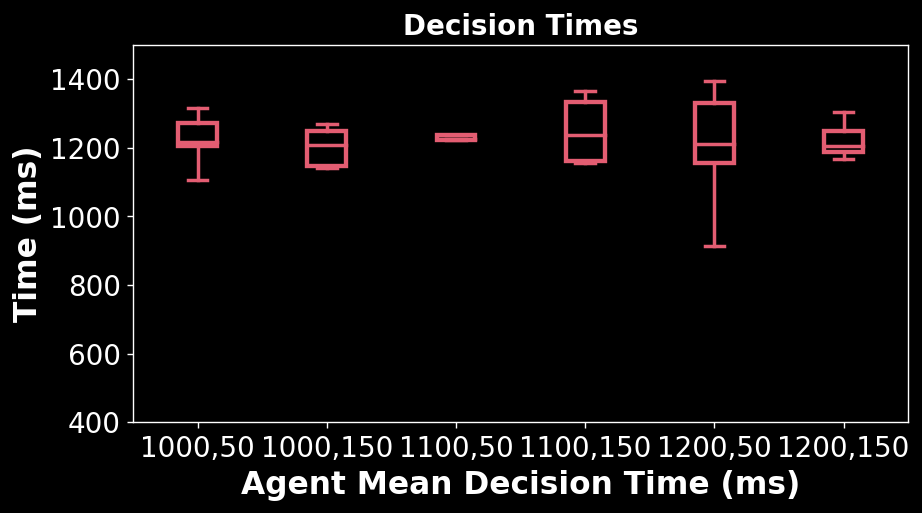

In [35]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,1800,200)
plt.figure(dpi=125, figsize = (8,4))
ax=plt.subplot()
boxplot(player_mean_decision_time, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean Decision Time (ms)",
        ylab='Time (ms)', title='Decision Times')
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(400,1500)
plt.savefig(PATH+save_path+'decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Indecisions, Wins, Wrong Decisions

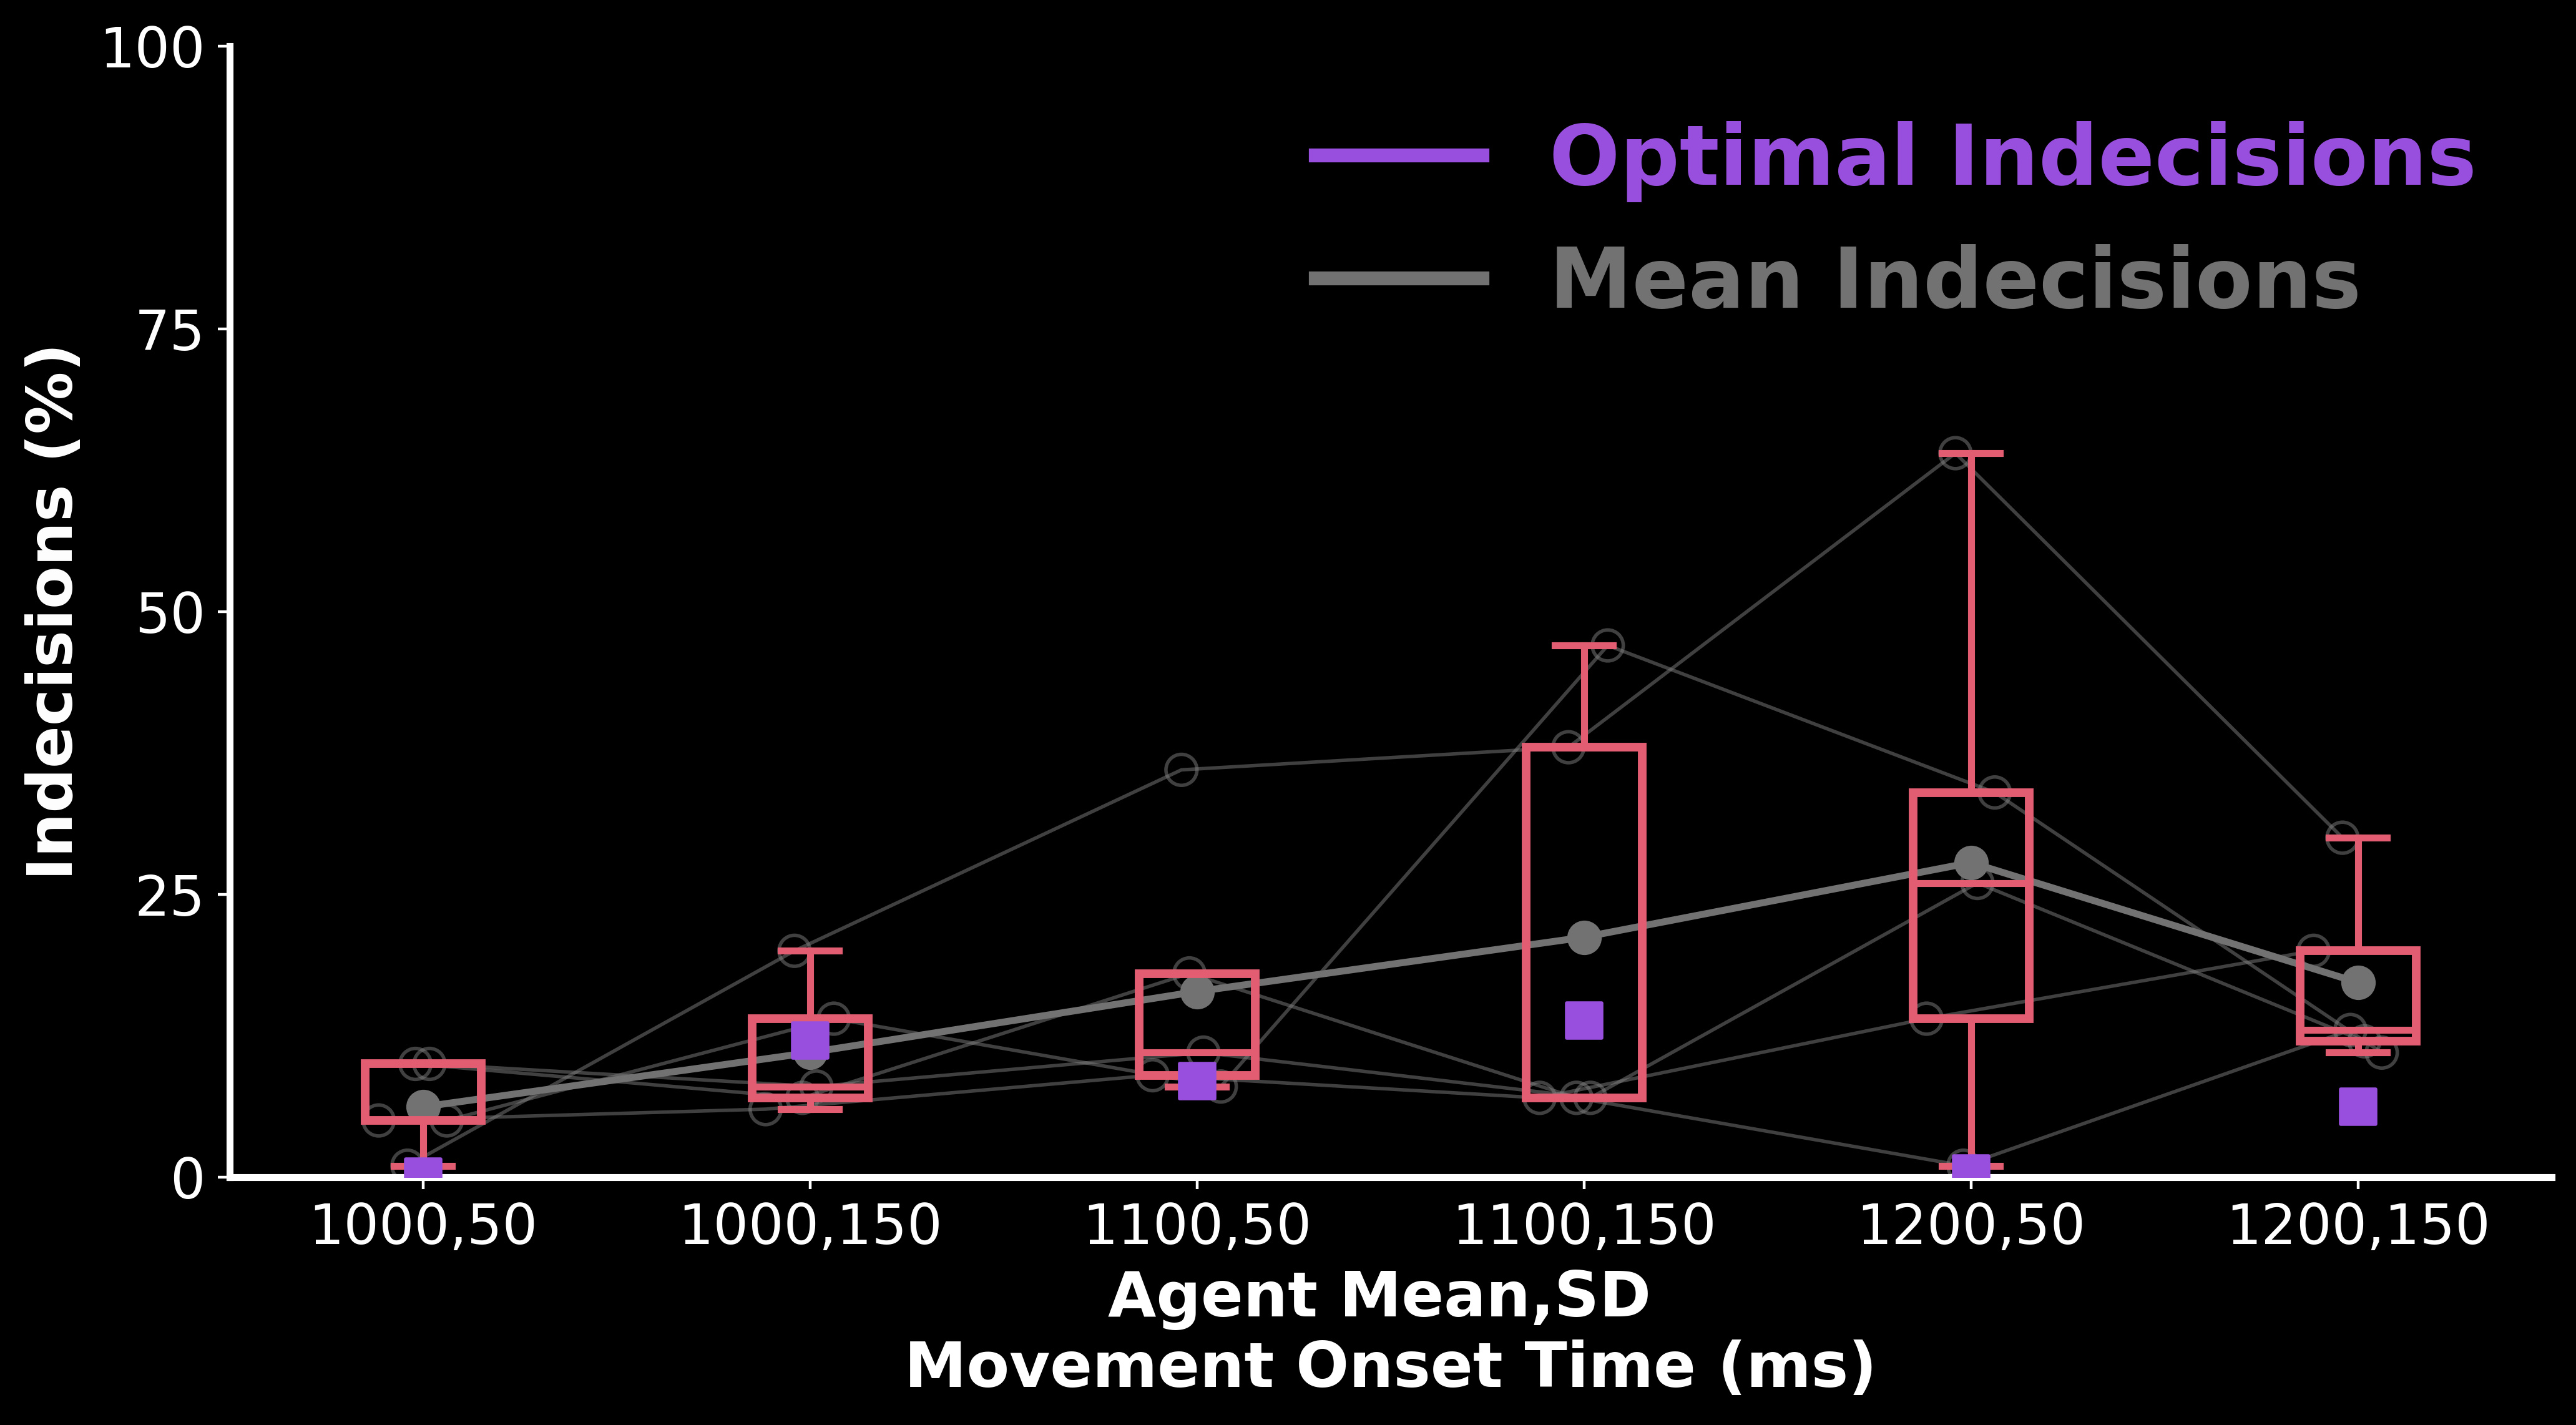

In [36]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
stored_optimal_indecisions = [0.06,12.07,8.5,13.84,0.3,6.24]

plt.figure(dpi=400, figsize=(12,6))
ax=plt.subplot()
boxplot(perc_player_indecisions, box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean,SD \nMovement Onset Time (ms)",
       ylab='Indecisions (%)', title=None)
#ax.plot(jitter(xlocs, perc_player_indecisions).T,perc_player_indecisions.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
dv.jitter_array(ax,xlocs,perc_player_indecisions.T,0.1, circle_size = 80, circle_lw = 1,lw = 1, circle_alpha = 0.5, include_mean = True )
ax.scatter(xlocs,stored_optimal_indecisions, marker = 's', s = 100,c=wheel.purple, zorder = 20)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
dv.Custom_Legend(ax,['Optimal Indecisions','Mean Indecisions'],[wheel.purple,wheel.dark_grey], fontsize = 24)
plt.savefig(PATH+save_path+'indecision_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

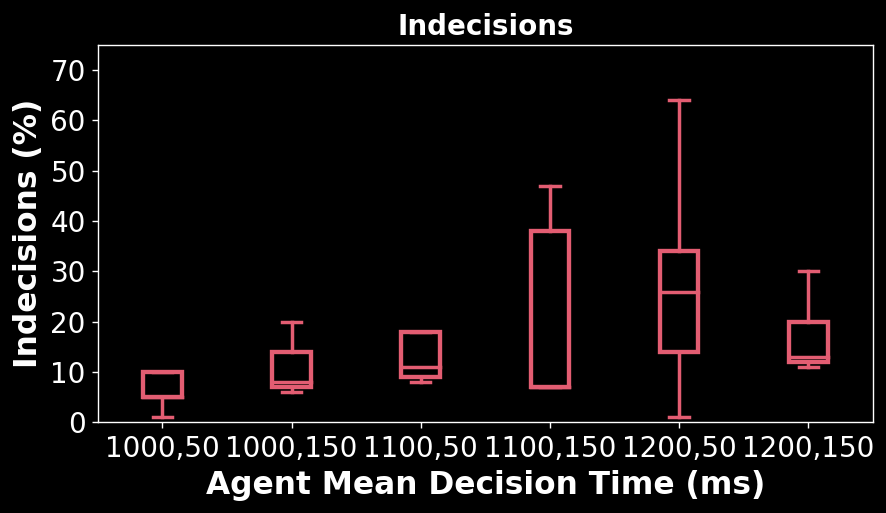

In [37]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,75,10)
plt.figure(dpi=125, figsize=(8,4))
ax=plt.subplot()
boxplot(perc_player_indecisions,box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean Decision Time (ms)",
        ylab='Indecisions (%)', title='Indecisions')
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,75)
plt.savefig(PATH+save_path+'indecision_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

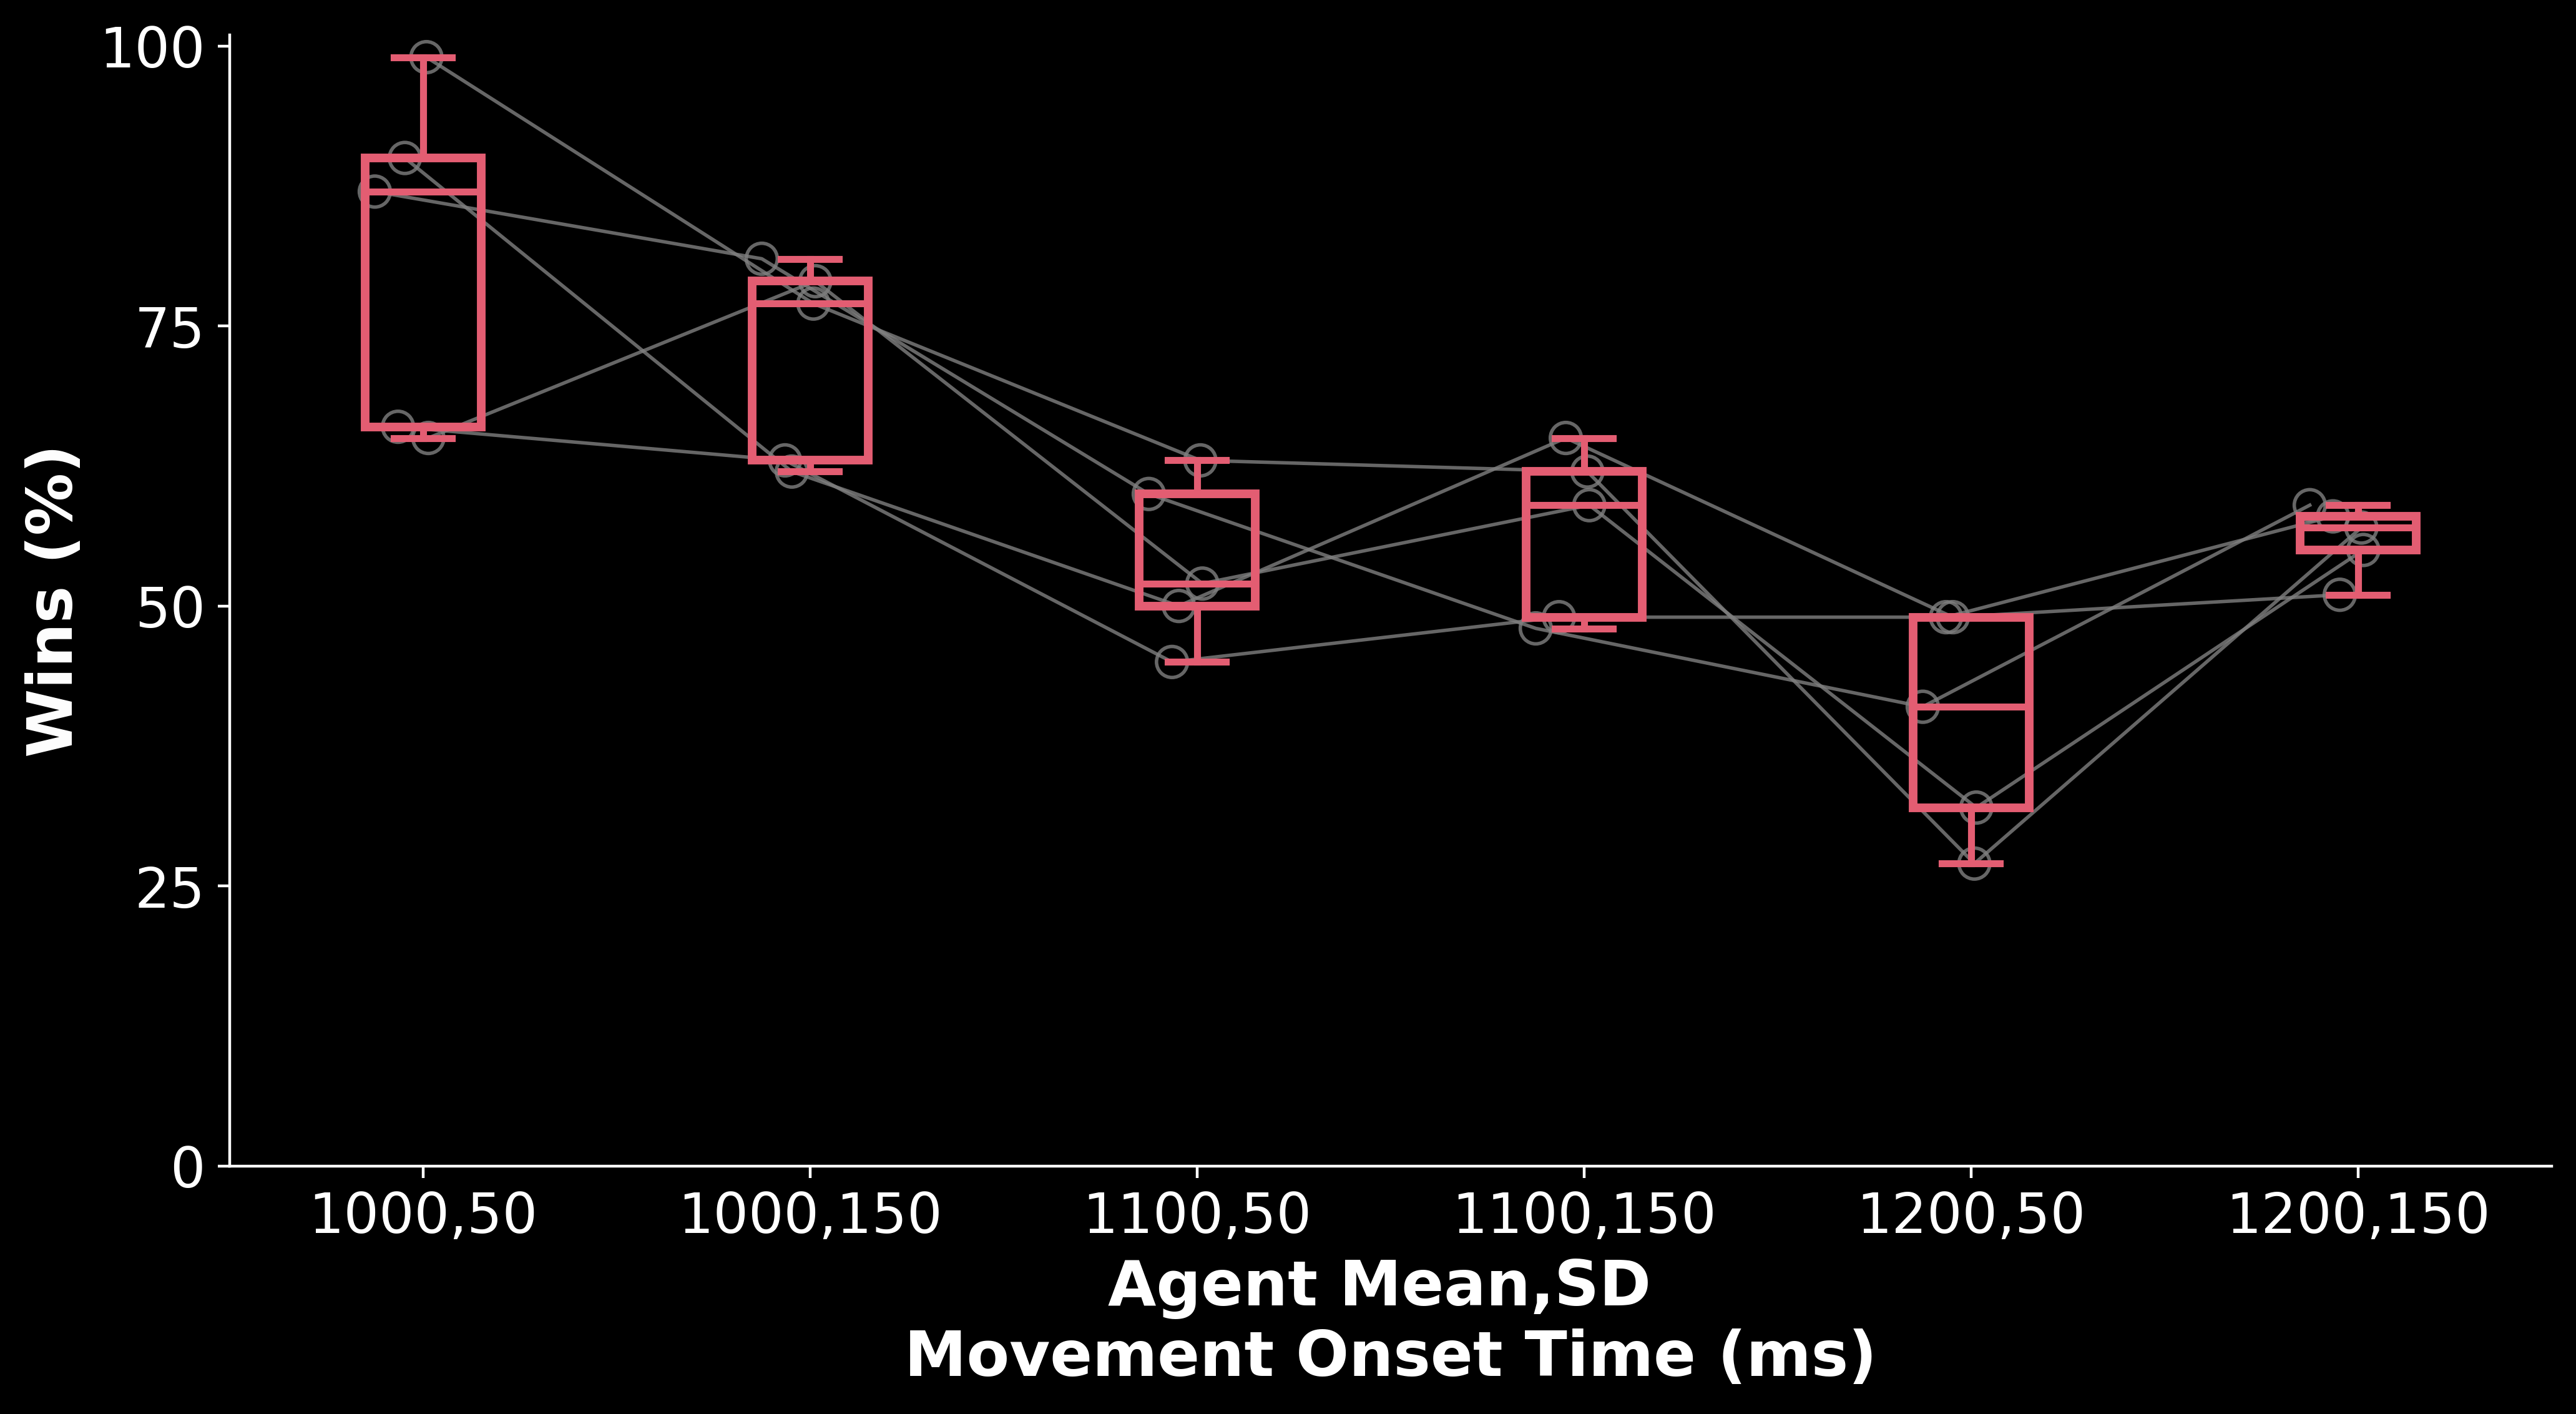

In [38]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi=400, figsize=(12,6))
ax=plt.subplot()
boxplot(perc_player_wins, box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean,SD \nMovement Onset Time (ms)",
        ylab='Wins (%)', title=None)
#ax.plot(jitter(xlocs, perc_player_indecisions).T,perc_player_indecisions.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
dv.jitter_array(ax,xlocs,perc_player_wins.T,0.1, circle_size = 80, circle_lw = 1,lw = 1, circle_alpha = 0.8, include_mean = False, )
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,101)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(PATH+save_path+'indecision_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

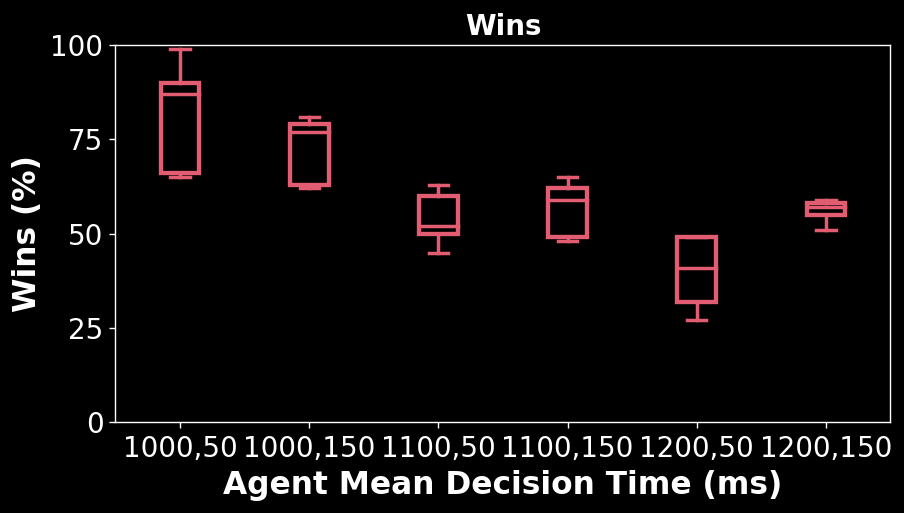

In [39]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi=125, figsize=(8,4))
ax=plt.subplot()
boxplot(perc_player_wins,box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean Decision Time (ms)",
        ylab='Wins (%)', title='Wins')
ax.set_ylim(0,100)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
plt.savefig(PATH+save_path+'wins_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

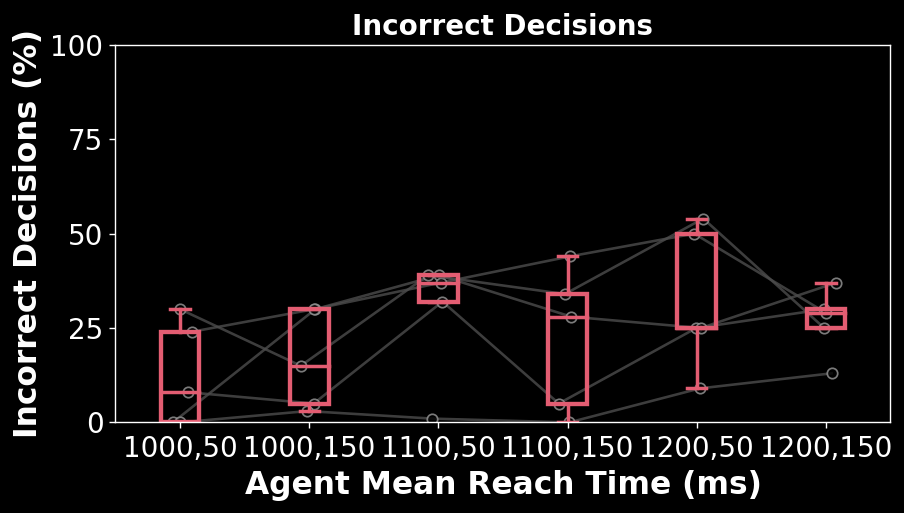

In [40]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi=125, figsize=(8,4))
ax=plt.subplot()
boxplot(perc_player_incorrect_decisions, box_widths = 0.05,xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
ax.plot(jitter(xlocs, perc_player_incorrect_decisions).T,perc_player_incorrect_decisions.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
plt.savefig(PATH+save_path+'incorrect_decisions_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

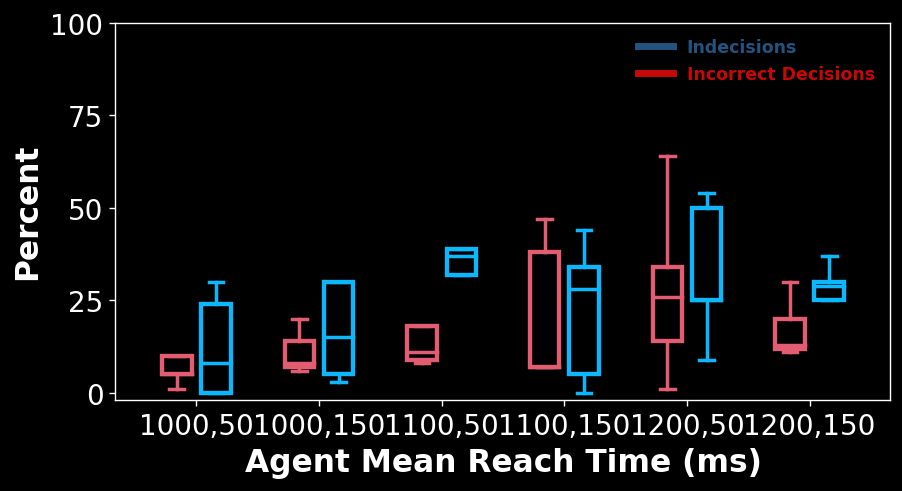

In [41]:
#%% Incorrect decisions and indecisions boxplot together
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,110,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(8,4))
ax=plt.subplot()
boxplot(perc_player_indecisions, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Indecisions', "Incorrect Decisions"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
#ax.plot(jitter((xlocs-box_width*4), perc_player_indecisions).T,perc_player_indecisions.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )

boxplot(perc_player_incorrect_decisions, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Indecisions', "Incorrect Decisions"],xlab = "Agent Mean Reach Time (ms)",
        ylab='Percent', title='')
#ax.plot(jitter((xlocs+box_width*4), perc_player_incorrect_decisions).T,perc_player_incorrect_decisions.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(-2,100)
plt.savefig(PATH+save_path+'indecisions_incorrect_decisions_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

In [42]:
perc_player_incorrect_decisions

array([[ 8.,  5., 32.,  5., 25., 30.],
       [ 0., 30., 39., 28., 25., 37.],
       [24., 30., 37., 44., 50., 29.],
       [30., 15., 39., 34., 54., 25.],
       [ 0.,  3.,  1.,  0.,  9., 13.]])

Indecisions vs Wins scatter 

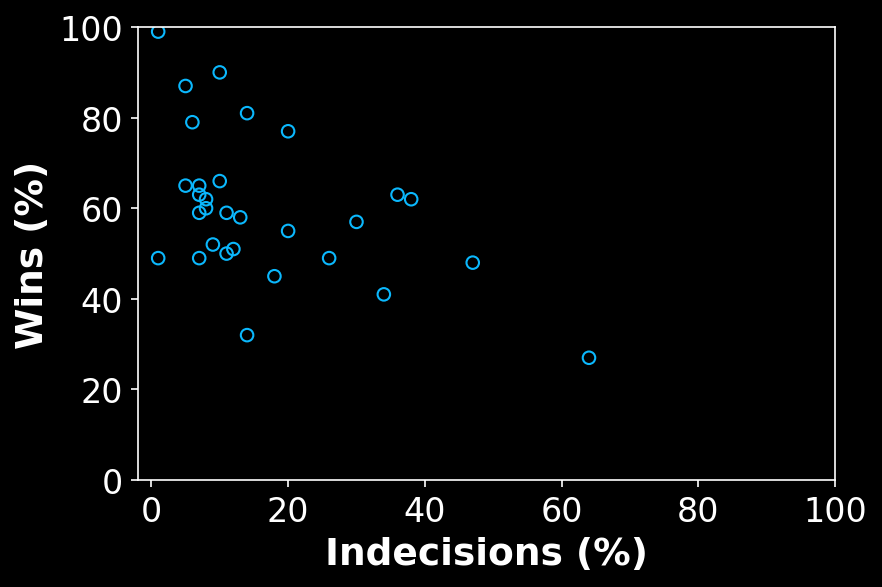

In [43]:
fig,ax = plt.subplots(dpi = 150)
ax.scatter(perc_player_indecisions, perc_player_wins, facecolor='none', edgecolors=wheel.rak_blue)
ax.set_xlabel('Indecisions (%)')
ax.set_ylabel('Wins (%)')
ax.set_xlim(-2,100)
ax.set_ylim(0,100)
plt.show()

incorrect decisions vs wins

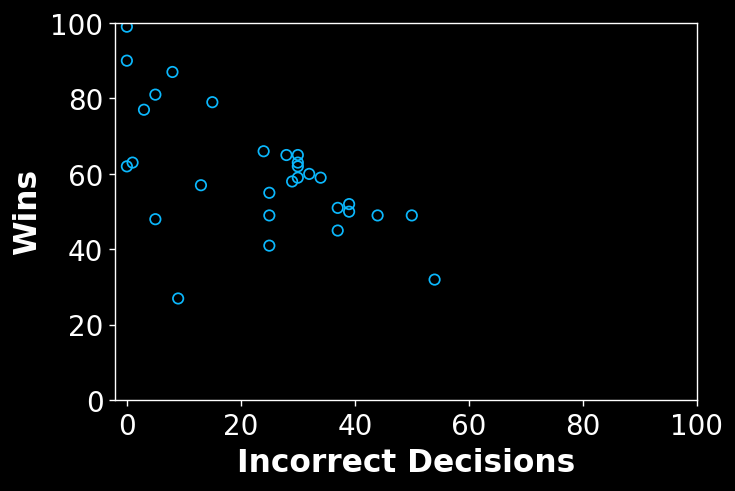

In [44]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(perc_player_incorrect_decisions, perc_player_wins, facecolor='none', edgecolors=wheel.rak_blue)
ax.set_xlabel('Incorrect Decisions')
ax.set_ylabel('Wins')
ax.set_xlim(-2,100)
ax.set_ylim(0,100)
plt.show()

Indecisions vs wins for each condition

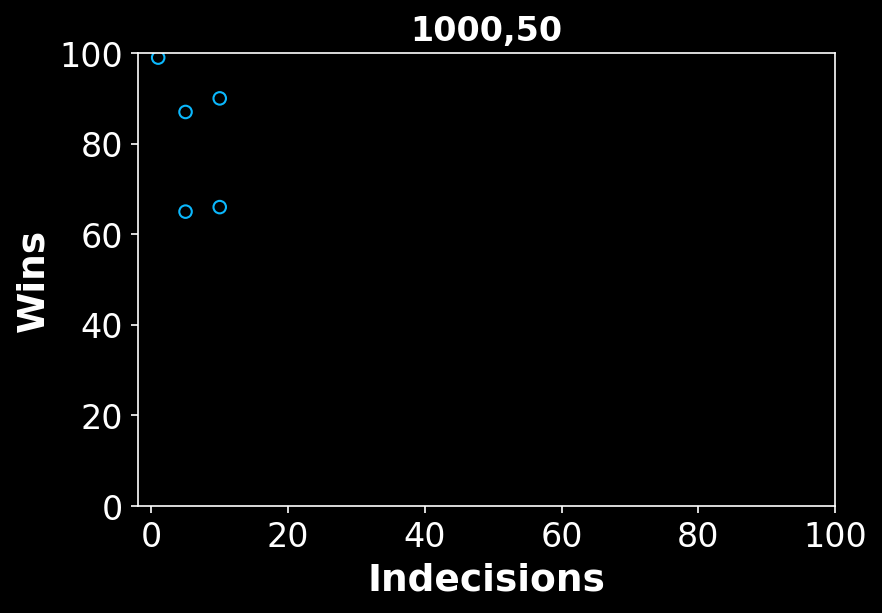

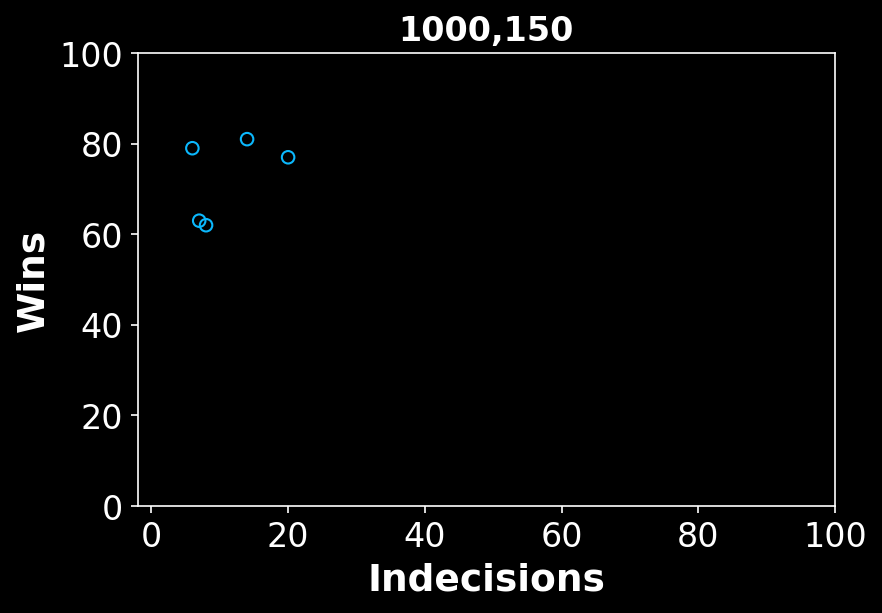

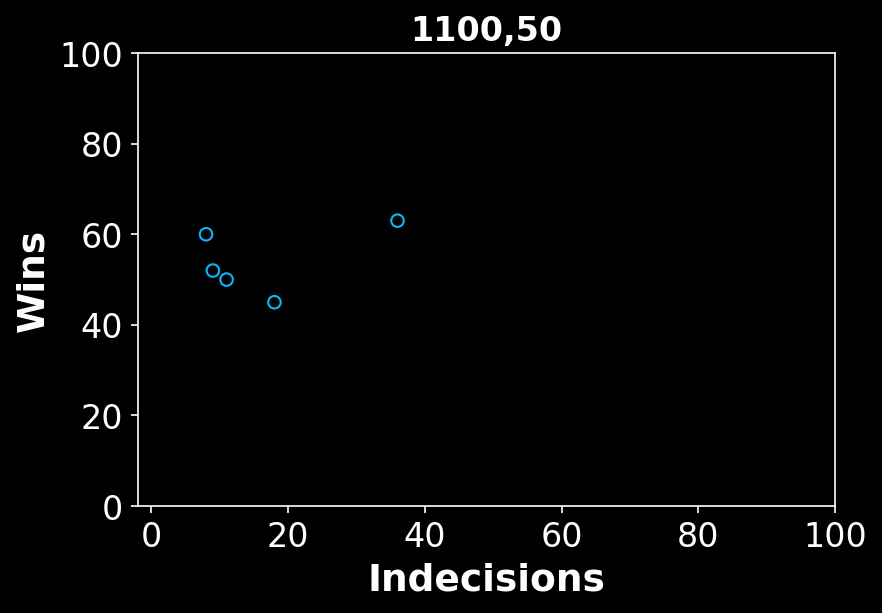

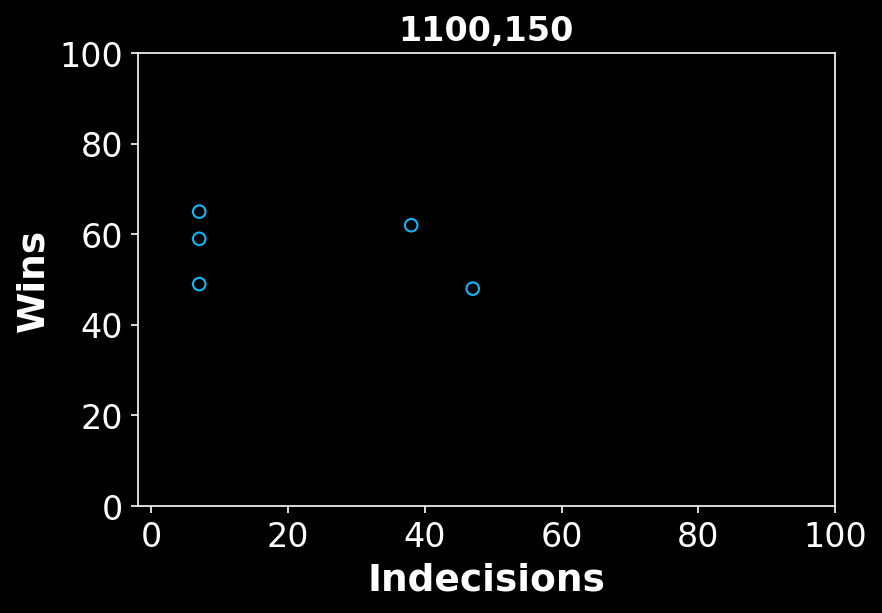

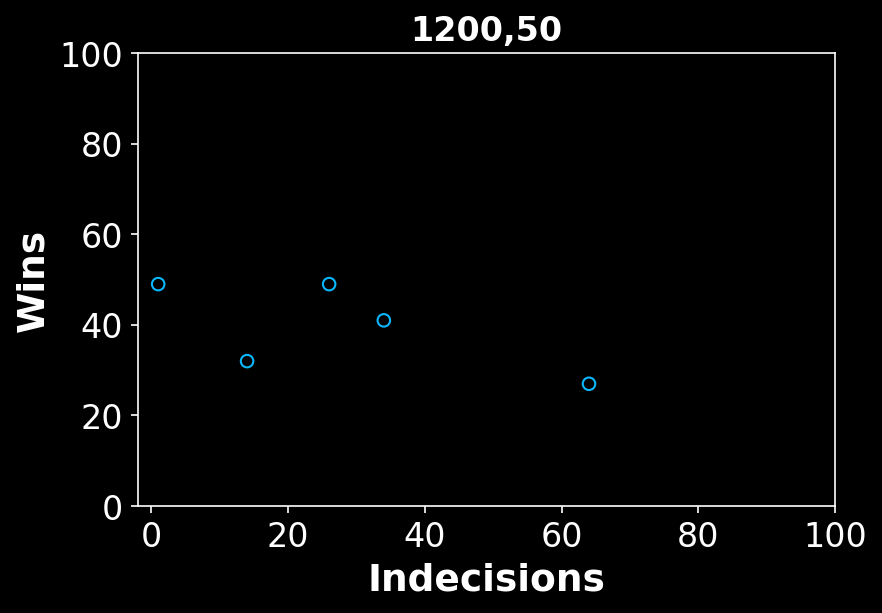

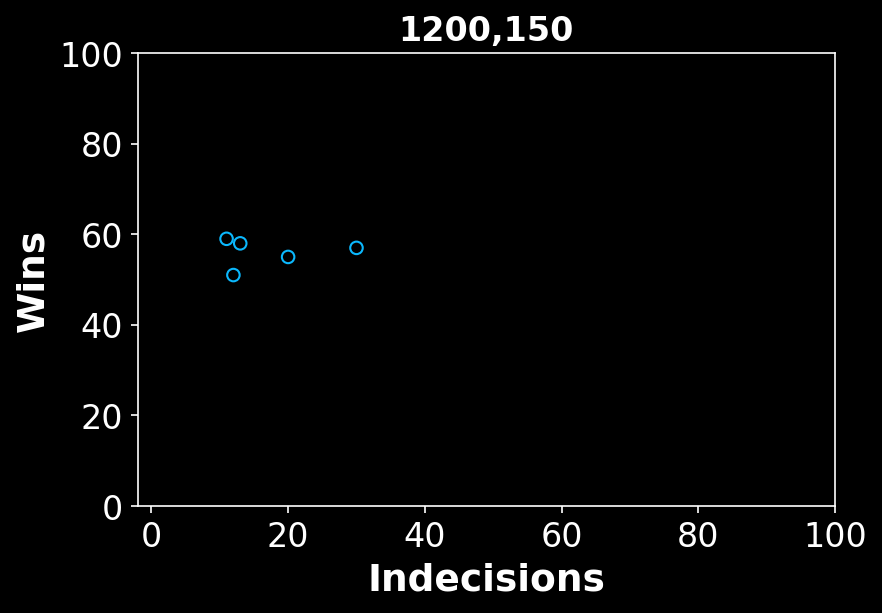

In [45]:
for j in range(num_blocks):
    fig,ax = plt.subplots(dpi = 150)
    ax.scatter(perc_player_indecisions[:,j], perc_player_wins[:,j], facecolor='none', edgecolors=wheel.rak_blue)
    ax.set_xlabel('Indecisions')
    ax.set_ylabel('Wins')
    ax.set_xlim(-2,100)
    ax.set_ylim(0,100)
    ax.set_title(trial_block_titles[j])
    plt.show()

Reaction time and wins

(0.0, 100.0)

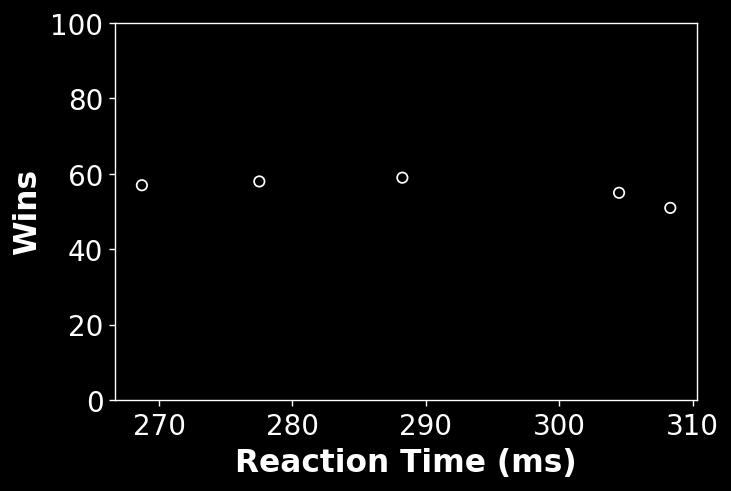

In [46]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(rt_mean, perc_player_wins[:,5], facecolor='none', edgecolors='white')
ax.set_xlabel('Reaction Time (ms)')
ax.set_ylabel('Wins')
ax.set_ylim(0,100)

Text(0, 0.5, 'Mean Decision Time')

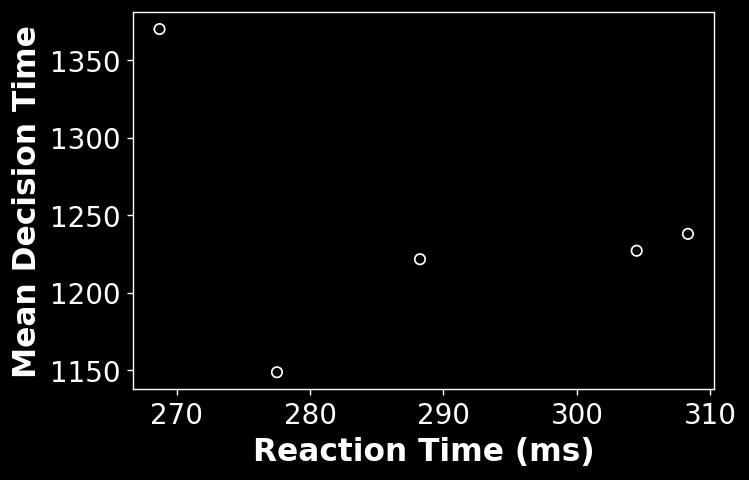

In [47]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(rt_mean, player_mean_decision_time[:,2], facecolor='none', edgecolors='white')
ax.set_xlabel('Reaction Time (ms)')
ax.set_ylabel('Mean Decision Time')


Gamble decision means and wins scatter

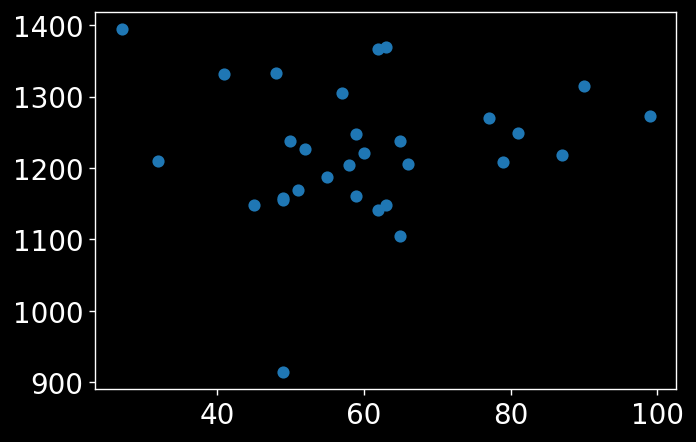

In [48]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(player_wins, gamble_decision_time_means)

Gamble decision means boxplot

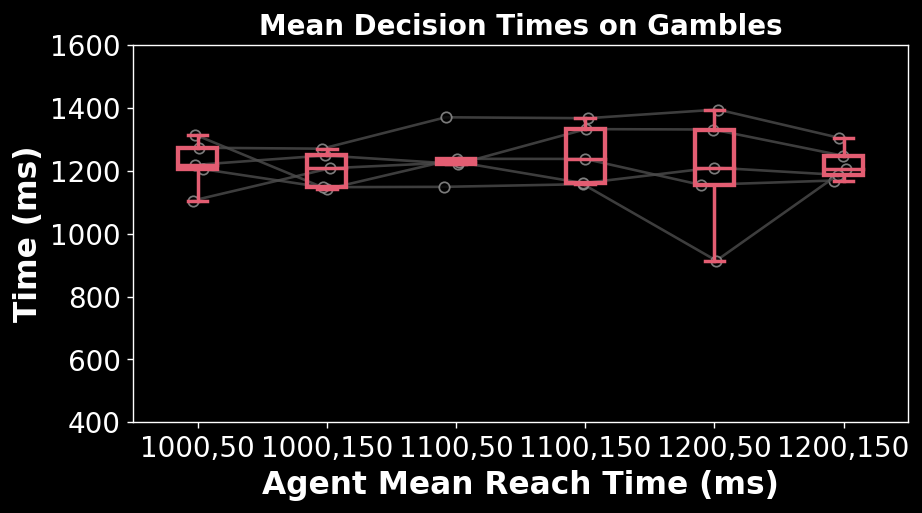

In [49]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,1800,200)
plt.figure(dpi=125, figsize=(8,4))
ax=plt.subplot()
boxplot(gamble_decision_time_means,xlocs, ylocs, box_widths=0.05, xlab = "Agent Mean Reach Time (ms)",
        ylab='Time (ms)', title='Mean Decision Times on Gambles')
ax.plot(jitter(xlocs, gamble_decision_time_means).T,gamble_decision_time_means.T, marker = 'o', markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
ax.set_ylim(400,1600)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
plt.savefig(PATH+save_path+'mean_decision_times_on_gambles', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

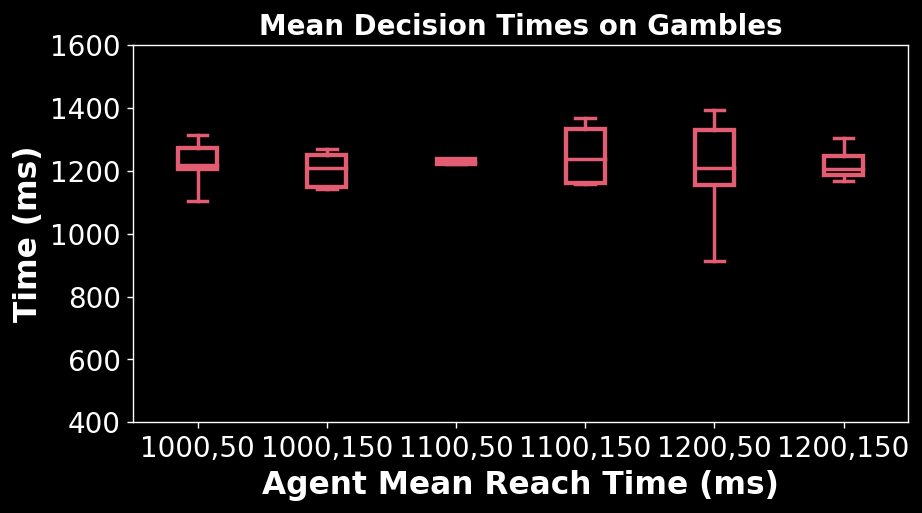

In [50]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,1800,200)
plt.figure(dpi=125, figsize=(8,4))
ax=plt.subplot()
boxplot(gamble_decision_time_means,xlocs, ylocs, box_widths=0.05, xlab = "Agent Mean Reach Time (ms)",
        ylab='Time (ms)', title='Mean Decision Times on Gambles')
ax.set_ylim(400,1600)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
plt.savefig(PATH+save_path+'mean_decision_times_on_gambles_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Reaction decision means boxplot

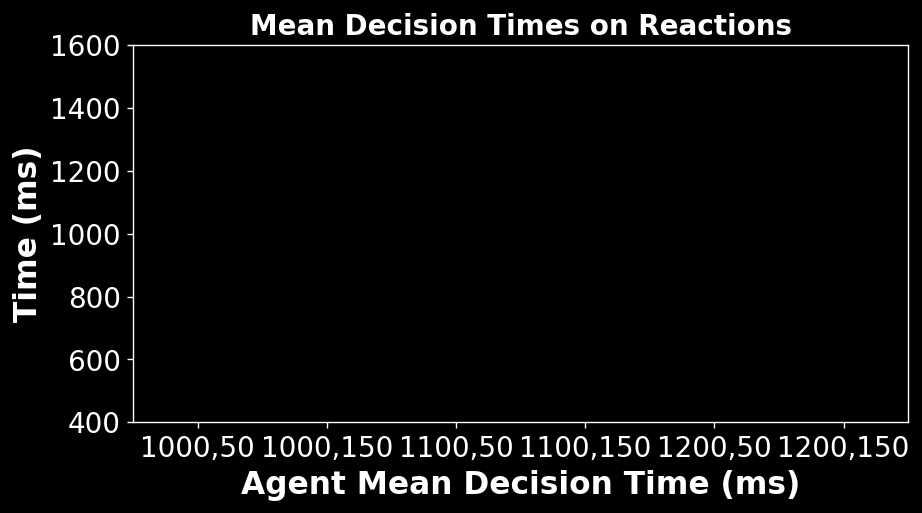

In [51]:
dot_color = 'black'
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,1800,200)
plt.figure(dpi=125, figsize=(8,4))
ax=plt.subplot()
boxplot(reaction_decision_time_means,xlocs, ylocs, box_widths=0.05 ,xlab = "Agent Mean Decision Time (ms)",
        ylab='Time (ms)', title='Mean Decision Times on Reactions')
ax.plot(jitter(xlocs, reaction_decision_time_means).T,reaction_decision_time_means.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(400,1600)
plt.savefig(PATH+save_path+'mean_decision_times_on_reactions', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

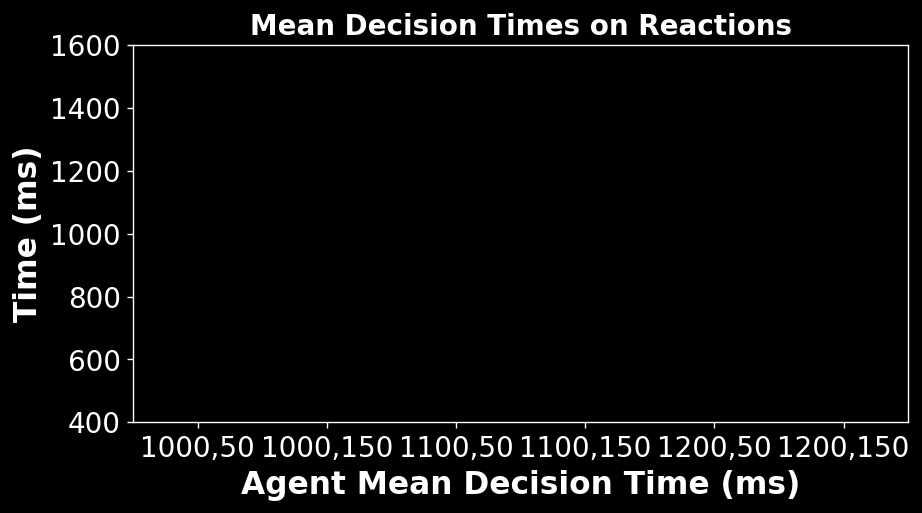

In [52]:

xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,1800,200)
plt.figure(dpi=125, figsize=(8,4))
ax=plt.subplot()
boxplot(reaction_decision_time_means,xlocs, ylocs, box_widths=0.05 ,xlab = "Agent Mean Decision Time (ms)",
        ylab='Time (ms)', title='Mean Decision Times on Reactions')
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(400,1600)
plt.savefig(PATH+save_path+'mean_decision_times_on_reactions_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Reaction and gamble boxplot side by side

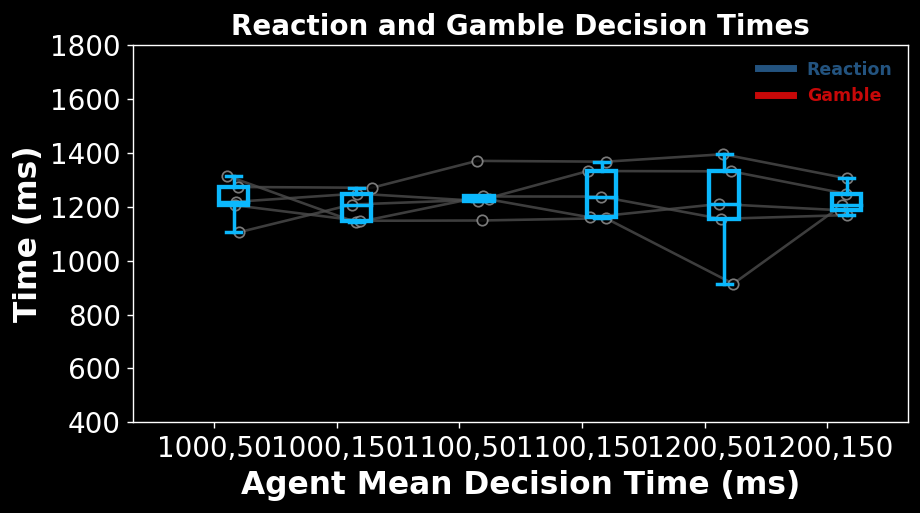

In [53]:
#%% Incorrect decisions and indecisions boxplot together
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,2000,200)
box_width = 0.04
plt.figure(dpi=125, figsize=(8,4))
ax=plt.subplot()
boxplot(reaction_decision_time_means, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
ax.plot(jitter((xlocs-box_width*4), reaction_decision_time_means).T,reaction_decision_time_means.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )

boxplot(gamble_decision_time_means, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean Decision Time (ms)",
        ylab='Time (ms)', title='Reaction and Gamble Decision Times')
ax.plot(jitter((xlocs+box_width*4), gamble_decision_time_means).T,gamble_decision_time_means.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
ax.set_ylim(400,1800)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
plt.savefig(PATH+save_path+'reaction_and_gamble_decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

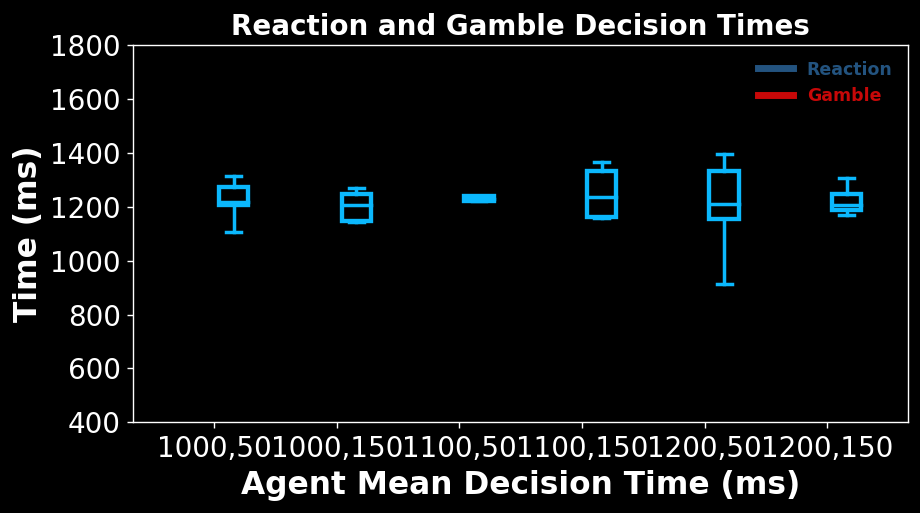

In [54]:
#%% Incorrect decisions and indecisions boxplot together
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,2000,200)
box_width = 0.04
plt.figure(dpi=125, figsize=(8,4))
ax=plt.subplot()
boxplot(reaction_decision_time_means, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')

boxplot(gamble_decision_time_means, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean Decision Time (ms)",
        ylab='Time (ms)', title='Reaction and Gamble Decision Times')
ax.set_ylim(400,1800)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
plt.savefig(PATH+save_path+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Difference in agent and player decision times boxplot

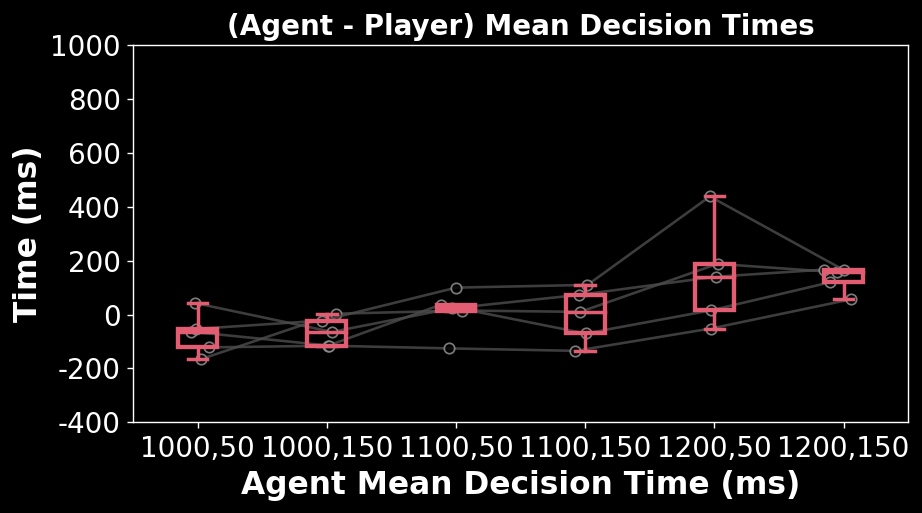

In [55]:
#%% Average difference in agent target left time and player target left time for each condition 
# It's not so much the average reach time that matters as much as the difference between the agent and the player
# This is an indicator of gambling for each state
mean_diff_decision_time = agent_mean_decision_time - player_mean_decision_time
xlocs = np.arange(0, num_blocks)
ylocs  = np.arange(-400,1200,200)
plt.figure(dpi = 125, figsize = (8,4))
ax = plt.subplot()
boxplot(mean_diff_decision_time,xlocs = xlocs, ylocs = ylocs, box_widths=0.05, xlab = "Agent Mean Decision Time (ms)",
        ylab='Time (ms)', title='(Agent - Player) Mean Decision Times')
ax.plot(jitter(xlocs, mean_diff_decision_time).T,mean_diff_decision_time.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
ax.set_xticklabels(trial_block_titles)
ax.set_yticks(ylocs)
ax.set_yticklabels(ylocs)
plt.savefig(PATH+save_path+'agent_player_diff_mean_decision_time', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

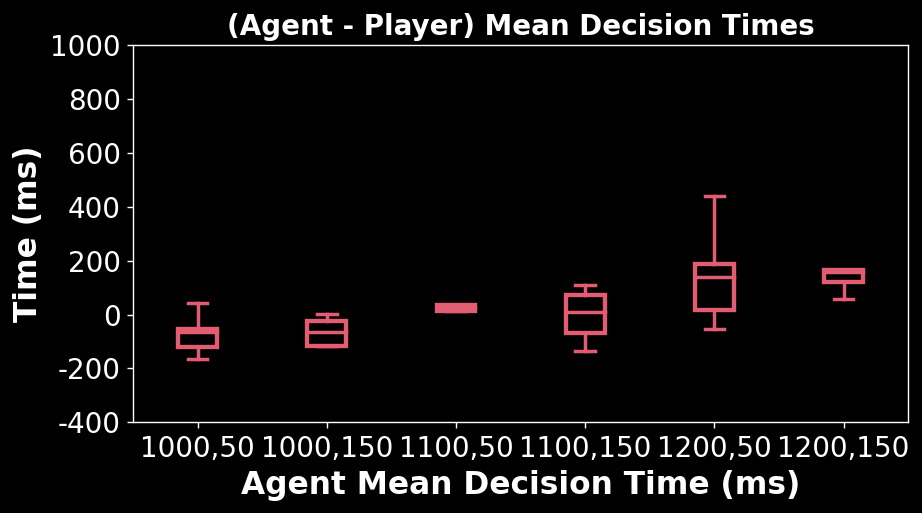

In [56]:
#%% Average difference in agent target left time and player target left time for each condition 
# It's not so much the average reach time that matters as much as the difference between the agent and the player
# This is an indicator of gambling for each state
mean_diff_decision_time = agent_mean_decision_time - player_mean_decision_time
xlocs = np.arange(0, num_blocks)
ylocs  = np.arange(-400,1200,200)
plt.figure(dpi = 125, figsize = (8,4))
ax = plt.subplot()
boxplot(mean_diff_decision_time,xlocs = xlocs, ylocs = ylocs, box_widths=0.05, xlab = "Agent Mean Decision Time (ms)",
        ylab='Time (ms)', title='(Agent - Player) Mean Decision Times')
ax.set_xticklabels(trial_block_titles)
plt.savefig(PATH+save_path+'agent_player_diff_mean_decision_time_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Binning agent reach times

In [57]:
#%% Bin agent left start times into 100ms chunks
# Find pLaer left start time and find mean for each of the chunks
# Compare across conditions
bins = np.arange(900,1600,50)
binned_player_decision_times = np.zeros((num_blocks,len(bins)-1,num_trials))*np.nan 

for b in range(len(bins)-1):
    bin_index = np.argwhere((bins[b] < agent_decision_time) & (agent_decision_time < bins[b+1]))# and agent_decision_time < bins[b+1])
    c=-1
    for i,j,k in bin_index:
        c+=1
        binned_player_decision_times[j,b,k] = player_decision_time[i,j,k] 
mean_of_each_condition_each_bin = np.zeros((num_blocks, len(bins)-1))
for a in range(num_blocks):
    for b in range(len(bins)-1):
        mean_of_each_condition_each_bin[a,b] = np.nanmean(binned_player_decision_times[a,b,:])

C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_22820\2938322470.py:16: RuntimeWarning: Mean of empty slice
  mean_of_each_condition_each_bin[a,b] = np.nanmean(binned_player_decision_times[a,b,:])


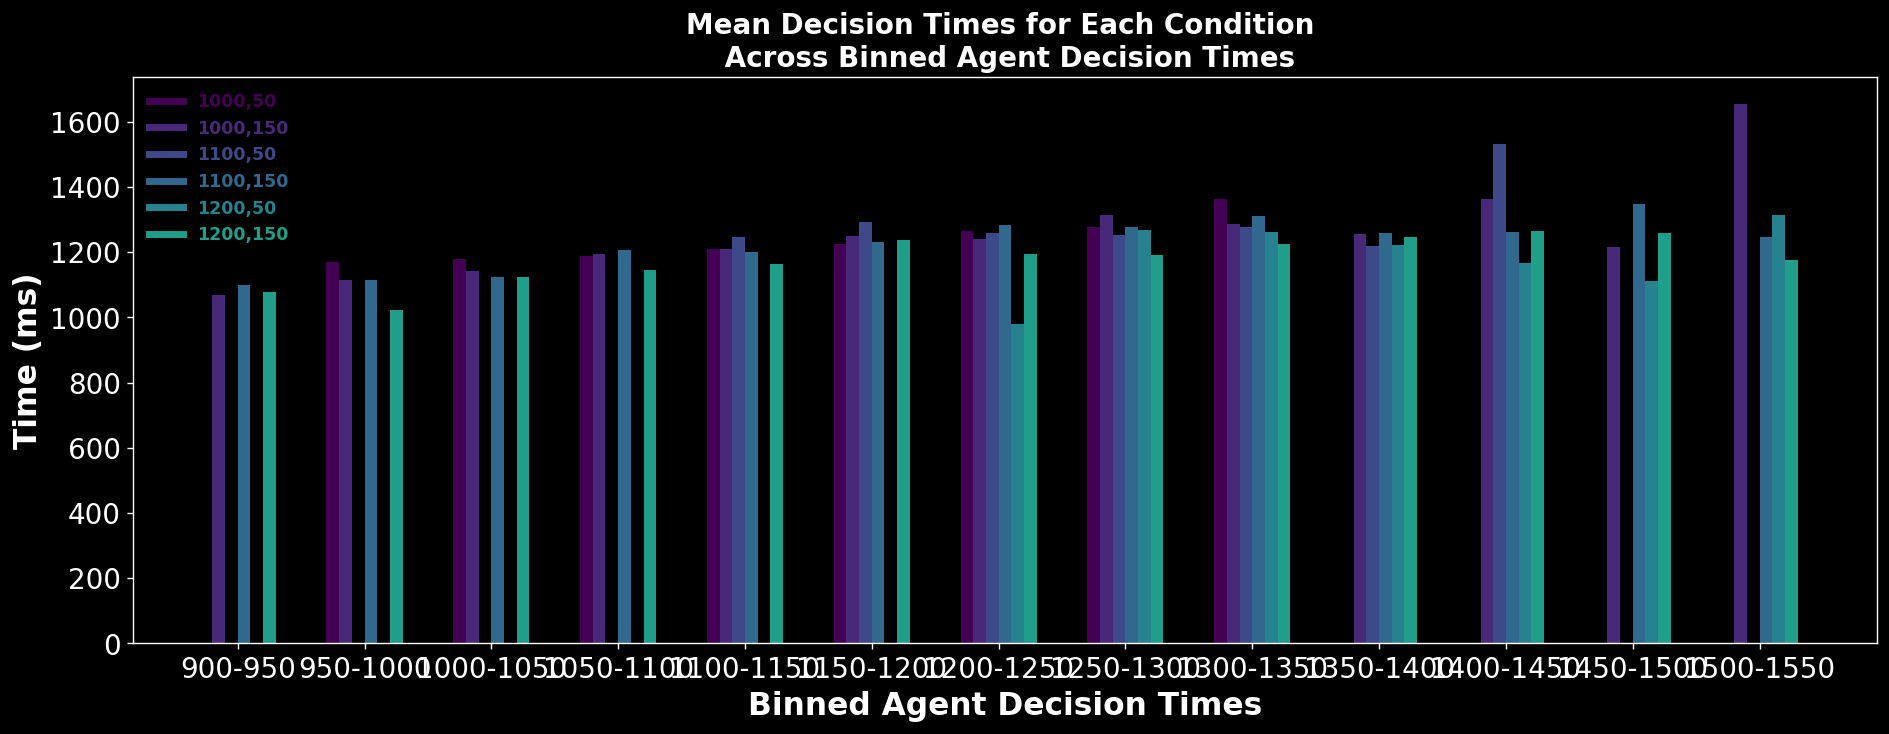

In [58]:
#%% Plot the above
if PATH == 'D:\\Subject_Data\\Seth_MatchPennies_Agent_Pilot_v1':
    xticklabs = []
    for i in range(len(bins)-1):
        xticklabs.append(f'{bins[i]}-{bins[i+1]}') 
    xlocs = np.arange(len(bins)-1)
    width = 0.1
    cdict = {'red':   ((0.0,  0.22, 0.0),
                    (0.5,  1.0, 1.0),
                    (1.0,  0.89, 1.0)),

            'green': ((0.0,  0.49, 0.0),
                    (0.5,  1.0, 1.0),
                    (1.0,  0.12, 1.0)),

            'blue':  ((0.0,  0.72, 0.0),
                    (0.5,  0.0, 0.0),
                    (1.0,  0.11, 1.0))}

    color = plt.cm.viridis(np.linspace(0, 1, 10))
    plt.figure(dpi = 125, figsize = (18,6))
    ax = plt.subplot()
    ax.bar(xlocs - width*3.5, mean_of_each_condition_each_bin[0,:], width=width, color=color[0])
    ax.bar(xlocs - width*2.5, mean_of_each_condition_each_bin[1,:], width=width, color=color[1])
    ax.bar(xlocs - width*1.5, mean_of_each_condition_each_bin[2,:], width=width, color=color[2])
    ax.bar(xlocs - width*0.5, mean_of_each_condition_each_bin[3,:], width=width, color=color[3])
    ax.bar(xlocs + width*0.5, mean_of_each_condition_each_bin[4,:], width=width, color=color[4])
    ax.bar(xlocs + width*1.5, mean_of_each_condition_each_bin[5,:], width=width, color=color[5])
    ax.bar(xlocs + width*2.5, mean_of_each_condition_each_bin[6,:], width=width, color=color[6])
    ax.bar(xlocs + width*3.5, mean_of_each_condition_each_bin[7,:], width=width, color=color[7])

    ax.set_xticks(xlocs)
    ax.set_xticklabels(xticklabs)
    ax.set_ylabel('Time (ms)')
    ax.set_xlabel('Binned Agent Reach Times')
    ax.set_title('Mean Decision Times for Each Condition \n Across Binned Agent Decision Times')
    labels = trial_block_titles
    dv.Custom_Legend(ax, labels, color[:8], fontsize = 10, loc='upper left')
    plt.savefig(PATH+save_path+'binned_reach_times', dpi = 400, transparent = True, bbox_inches='tight')
    plt.show()
    
elif PATH == 'D:\\Subject_Data\\Seth_MatchPennies_Agent_Pilot_v2':
    xticklabs = []
    for i in range(len(bins)-1):
        xticklabs.append(f'{bins[i]}-{bins[i+1]}') 
    xlocs = np.arange(len(bins)-1)
    width = 0.1
    cdict = {'red':   ((0.0,  0.22, 0.0),
                    (0.5,  1.0, 1.0),
                    (1.0,  0.89, 1.0)),

            'green': ((0.0,  0.49, 0.0),
                    (0.5,  1.0, 1.0),
                    (1.0,  0.12, 1.0)),

            'blue':  ((0.0,  0.72, 0.0),
                    (0.5,  0.0, 0.0),
                    (1.0,  0.11, 1.0))}

    color = plt.cm.viridis(np.linspace(0, 1, 10))
    plt.figure(dpi = 125, figsize = (18,6))
    ax = plt.subplot()
    ax.bar(xlocs - width*2.5, mean_of_each_condition_each_bin[0,:], width=width, color=color[0])
    ax.bar(xlocs - width*1.5, mean_of_each_condition_each_bin[1,:], width=width, color=color[1])
    ax.bar(xlocs - width*0.5, mean_of_each_condition_each_bin[2,:], width=width, color=color[2])
    ax.bar(xlocs + width*0.5, mean_of_each_condition_each_bin[3,:], width=width, color=color[3])
    ax.bar(xlocs + width*1.5, mean_of_each_condition_each_bin[4,:], width=width, color=color[4])
    ax.bar(xlocs + width*2.5, mean_of_each_condition_each_bin[5,:], width=width, color=color[5])
    ax.set_xticks(xlocs)
    ax.set_xticklabels(xticklabs)
    ax.set_ylabel('Time (ms)')
    ax.set_xlabel('Binned Agent Decision Times')
    ax.set_title('Mean Decision Times for Each Condition \n Across Binned Agent Decision Times')
    labels = trial_block_titles
    dv.Custom_Legend(ax, labels, color[:6], fontsize = 10, loc='upper left')
    plt.savefig(PATH+save_path+'binned_reach_times', dpi = 400, transparent = True, bbox_inches='tight')
    plt.show()
    
elif PATH == 'D:\\Subject_Data\\Seth_MatchPennies_Agent_Pilot_v3':
    xticklabs = []
    for i in range(len(bins)-1):
        xticklabs.append(f'{bins[i]}-{bins[i+1]}') 
    xlocs = np.arange(len(bins)-1)
    width = 0.1
    cdict = {'red':   ((0.0,  0.22, 0.0),
                    (0.5,  1.0, 1.0),
                    (1.0,  0.89, 1.0)),

            'green': ((0.0,  0.49, 0.0),
                    (0.5,  1.0, 1.0),
                    (1.0,  0.12, 1.0)),

            'blue':  ((0.0,  0.72, 0.0),
                    (0.5,  0.0, 0.0),
                    (1.0,  0.11, 1.0))}

    color = plt.cm.viridis(np.linspace(0, 1, 10))
    plt.figure(dpi = 125, figsize = (18,6))
    ax = plt.subplot()
    ax.bar(xlocs - width*2.5, mean_of_each_condition_each_bin[0,:], width=width, color=color[0])
    ax.bar(xlocs - width*1.5, mean_of_each_condition_each_bin[1,:], width=width, color=color[1])
    ax.bar(xlocs - width*0.5, mean_of_each_condition_each_bin[2,:], width=width, color=color[2])
    ax.bar(xlocs + width*0.5, mean_of_each_condition_each_bin[3,:], width=width, color=color[3])
    ax.bar(xlocs + width*1.5, mean_of_each_condition_each_bin[4,:], width=width, color=color[4])
    ax.bar(xlocs + width*2.5, mean_of_each_condition_each_bin[5,:], width=width, color=color[5])
    ax.set_xticks(xlocs)
    ax.set_xticklabels(xticklabs)
    ax.set_ylabel('Time (ms)')
    ax.set_xlabel('Binned Agent Decision Times')
    ax.set_title('Mean Decision Times for Each Condition \n Across Binned Agent Decision Times')
    labels = trial_block_titles
    dv.Custom_Legend(ax, labels, color[:6], fontsize = 10, loc='upper left')
    plt.savefig(PATH+save_path+'binned_reach_times', dpi = 400, transparent = True, bbox_inches='tight')
    plt.show()
    

In [59]:
mean_of_each_condition_each_bin[1,:]

array([1070.0625    , 1114.53571429, 1141.58536585, 1193.9375    ,
       1210.4893617 , 1249.57627119, 1240.6097561 , 1314.48837209,
       1286.125     , 1254.83333333, 1364.2       , 1216.75      ,
       1654.        ])

Binned boxplots

ValueError: List of boxplot statistics and `positions` values must have same the length

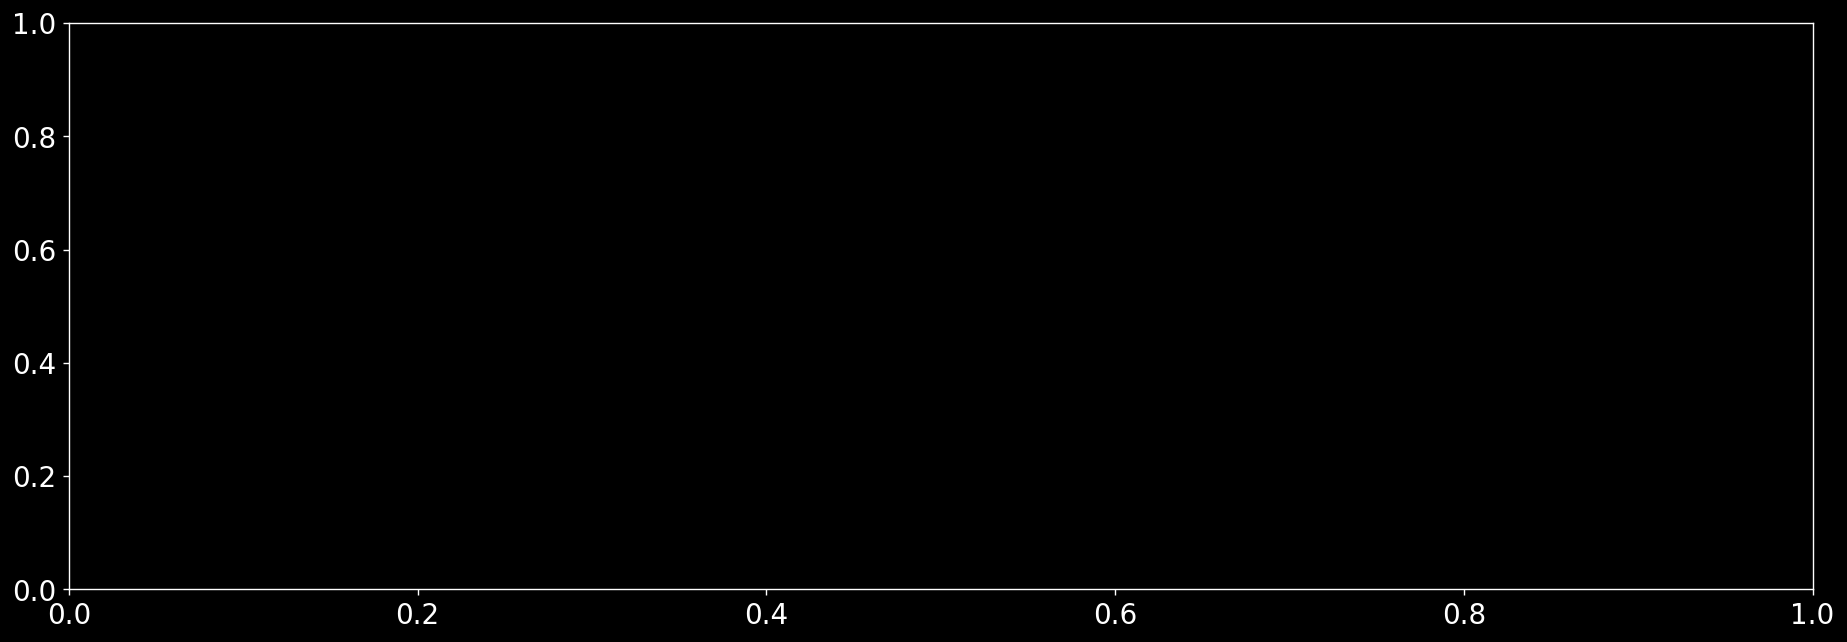

In [60]:
#%% Plot the above
xticklabs = []
for i in range(len(bins)-1):
    xticklabs.append(f'{bins[i]}-{bins[i+1]}') 
xlocs = np.arange(len(bins)-1)
ylocs = np.arange(0,1800,200)
width = 0.1
cdict = {'red':   ((0.0,  0.22, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.89, 1.0)),

         'green': ((0.0,  0.49, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.12, 1.0)),

         'blue':  ((0.0,  0.72, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  0.11, 1.0))}

color = plt.cm.viridis(np.linspace(0, 1, 10))
plt.figure(dpi = 125, figsize = (18,6))
ax = plt.subplot()
boxplot(binned_player_decision_times[0,:,:], xlocs-width*2.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
        ylab='Time (ms)', title='Mean Decision Times on Gambles')
boxplot(binned_player_decision_times[1,:,:], xlocs-width*1.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
        ylab='Time (ms)', title='Mean Decision Times on Gambles')
boxplot(binned_player_decision_times[2,:,:], xlocs-width*0.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
        ylab='Time (ms)', title='Mean Decision Times on Gambles')
boxplot(binned_player_decision_times[3,:,:], xlocs+width*0.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
        ylab='Time (ms)', title='Mean Decision Times on Gambles')
boxplot(binned_player_decision_times[4,:,:], xlocs+width*1.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
        ylab='Time (ms)', title='Mean Decision Times on Gambles')
boxplot(binned_player_decision_times[5,:,:], xlocs+width*2.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
        ylab='Time (ms)', title='Mean Decision Times on Gambles')
#ax.scatter(jitter(xlocs, binned_player_decision_times[0,:,:].T),binned_player_decision_times[0,:,:].T, facecolor = 'none', edgecolors='0.6' )# ax.boxplot(mean_of_each_condition_each_bin[0,:],positions = xlocs - width*2.5)
# ax.boxplot(mean_of_each_condition_each_bin[2,:],positions = xlocs - width*0.5)
# ax.boxplot(mean_of_each_condition_each_bin[3,:],positions = xlocs + width*0.5,)
# ax.boxplot(mean_of_each_condition_each_bin[4,:],positions = xlocs + width*1.5,)
# ax.boxplot(mean_of_each_condition_each_bin[5,:],positions = xlocs + width*2.5)
ax.set_xticks(xlocs)
ax.set_xticklabels(xticklabs)
labels = trial_block_titles
dv.Custom_Legend(ax, labels, color[:6], fontsize = 10, loc='upper left')
plt.tight_layout()

In [ ]:
np.shape(binned_player_decision_times[0,:,:])

(9, 100)

C:\Users\SETHSU~1\AppData\Local\Temp/ipykernel_25136/2950260381.py:18: RuntimeWarning: Mean of empty slice
  mean_of_each_condition_each_bin_player[a,b] = np.nanmean(binned_player_decision_times[a,b,:])
C:\Users\SETHSU~1\AppData\Local\Temp/ipykernel_25136/2950260381.py:19: RuntimeWarning: Mean of empty slice
  mean_of_each_condition_each_bin_agent[a,b] = np.nanmean(binned_agent_decision_times[a,b,:])


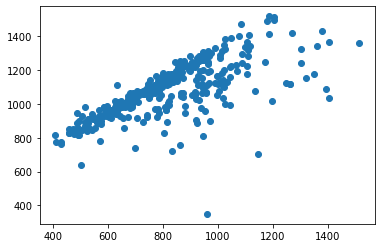

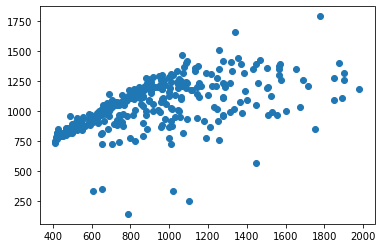

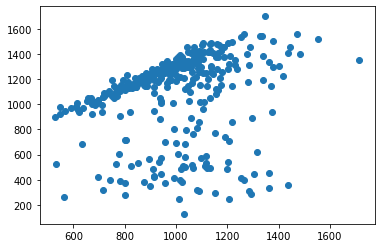

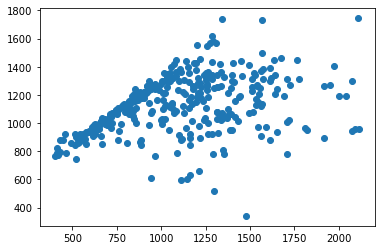

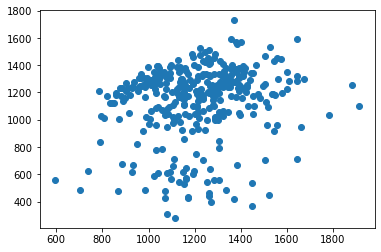

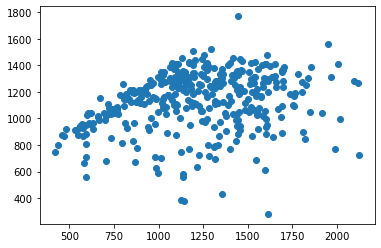

In [ ]:
# Scatter plot with finer bins
bins = np.arange(400,2200,50)
binned_player_decision_times = np.zeros((num_blocks,len(bins),num_trials))*np.nan 
binned_agent_decision_times = np.zeros((num_blocks,len(bins),num_trials))*np.nan 

for b in range(len(bins)-1):
    bin_index = np.argwhere((bins[b] < agent_decision_time) & (agent_decision_time < bins[b+1]))# and agent_decision_time < bins[b+1])
    c=-1
    for i,j,k in bin_index:
        c+=1
        binned_player_decision_times[j,b,k] = player_decision_time[i,j,k] 
        binned_agent_decision_times[j,b,k] = agent_decision_time[i,j,k]
        
mean_of_each_condition_each_bin_player = np.zeros((num_blocks, len(bins)-1))
mean_of_each_condition_each_bin_agent = np.zeros((num_blocks, len(bins)-1))
for a in range(num_blocks):
    for b in range(len(bins)-1):
        mean_of_each_condition_each_bin_player[a,b] = np.nanmean(binned_player_decision_times[a,b,:])
        mean_of_each_condition_each_bin_agent[a,b] = np.nanmean(binned_agent_decision_times[a,b,:])
for j in range(num_blocks):
    fig,ax = plt.subplots()
    ax.scatter(binned_agent_decision_times[j,:,:], binned_player_decision_times[j,:,:])
    plt.show()

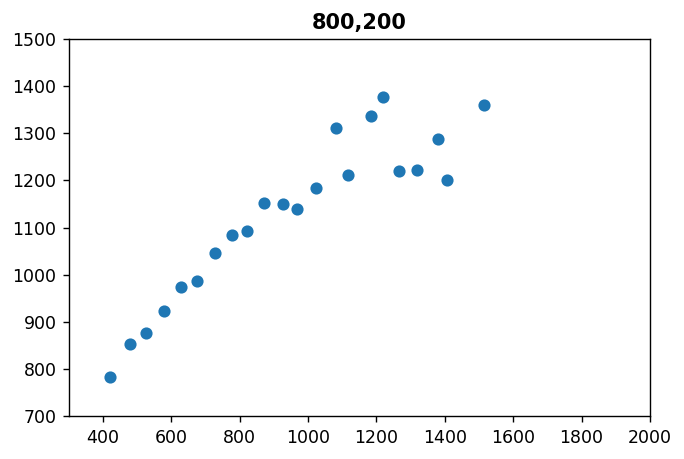

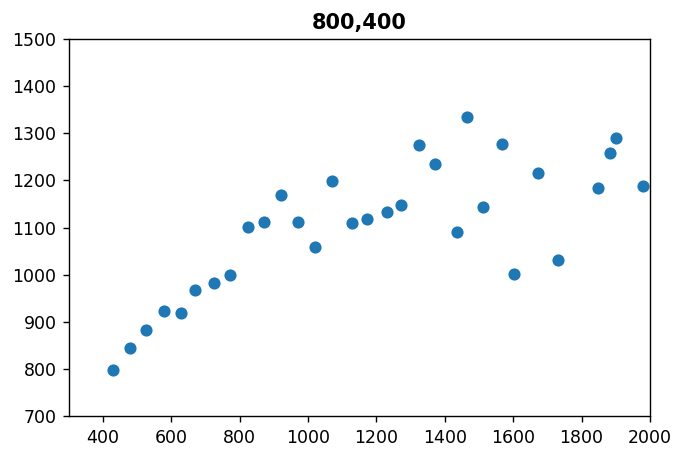

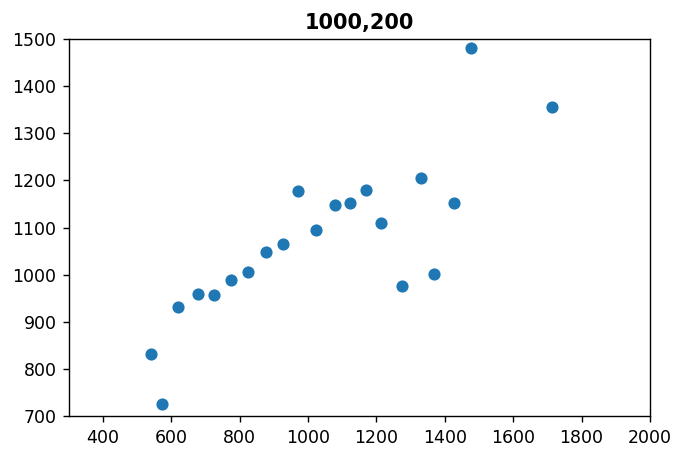

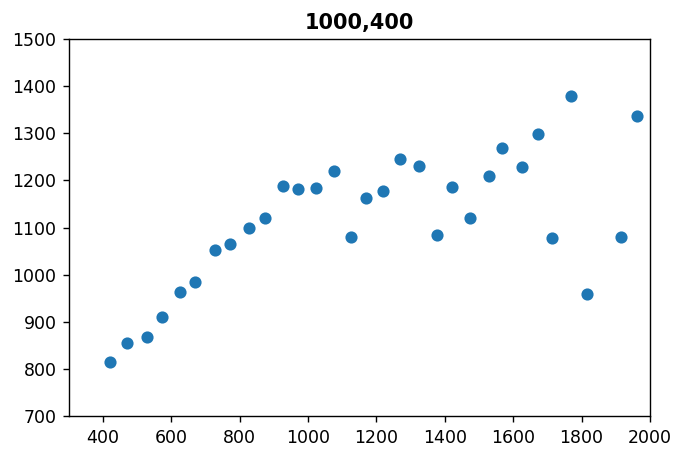

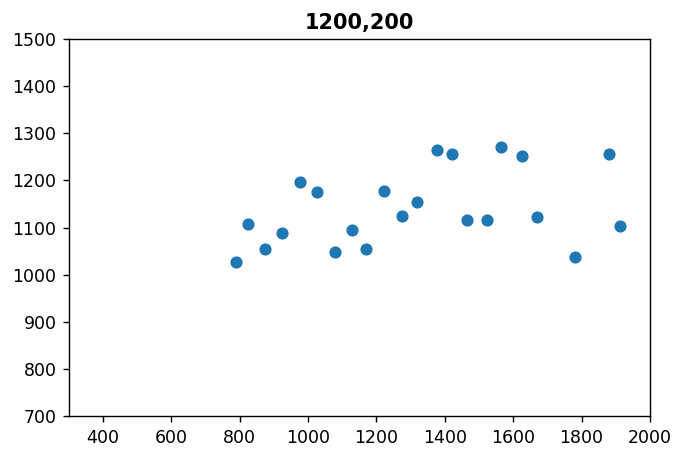

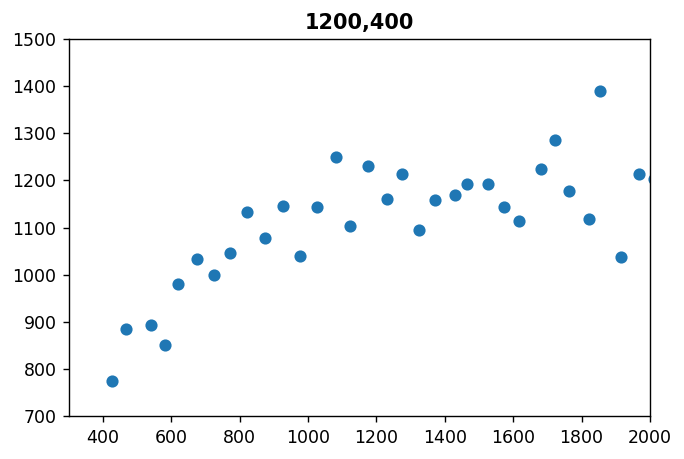

In [ ]:
for j in range(num_blocks):
    fig,ax = plt.subplots(dpi = 125)
    ax.scatter(mean_of_each_condition_each_bin_agent[j,:], mean_of_each_condition_each_bin_player[j,:])
    ax.set_title(trial_block_titles[j])
    ax.set_ylim(700,1500)
    ax.set_xlim(300,2000)
    plt.show()